# import package

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import os,sys
import re
import csv
import pandas as pd
import seaborn as sns
from datetime import datetime,timedelta
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
from collections import defaultdict, Counter

import itertools
flatten = itertools.chain.from_iterable

import warnings
import matplotlib.dates as mdates
if not sys.warnoptions:
    warnings.simplefilter("ignore")
#from termcolor import colored
#from adjustText import adjust_text

from statsmodels.formula.api import ols

import matplotlib
from matplotlib.ticker import MaxNLocator # maximum number of ticks
import platform

if platform.system() == "Darwin":
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
elif platform.system() == "Windows":
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
else:
    pass
from scipy.interpolate import make_interp_spline, BSpline
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from  scipy.stats import chi2_contingency

import pickle
def notify(title, text):
    os.system("""osascript -e 'display notification "{}" with title "{}"'""".format(text, title))

# figure 1

## data and prcessing

### import data

In [3]:
df=pd.read_csv('df_for_publication.txt')
df['city'] = df['city'].str.replace('市','')
df.head()
dff=pd.read_excel('2020data.xls')
dff=dff[['city','urban2020']]
dfff=dff.drop_duplicates()
dfff.head()
df=pd.merge(df,dfff,left_on='city',right_on='city')

### rca of education groups-industry

In [4]:
edu=pd.read_csv('df_for_publication.txt')
mp={'本科':'本科及以上','中技':'初中及以下','中专':'初中及以下','中技/中专':'初中及以下',
   '大专':'大专','高中':'高中','硕士':'本科及以上','博士':'本科及以上','初中及以下':'初中及以下'}
edu['edu'] = edu['edu'].map(mp)
mp={'初中及以下':'Junior school and below','高中':'High school',
    '大专':'Junior college','本科及以上':'Bachelor degree and above'}
edu['edu'] = edu['edu'].map(mp)
mp={'专业服务(咨询、人力资源、财会)':'Professional Services',
    '中介服务': 'Intermediary Service', 
     '互联网/电子商务': 'Internet/Electric Business', 
     '交通/运输/物流': 'Traffic/Transportation/Logistics', 
     '仪器仪表/工业自动化': 'Instrumentation/\nAutomation', 
     '会计/审计': 'Accounting/Auditing', 
     '保险': 'Insurance',
     '信托/担保/拍卖/典当': 'Trust/Guarantee/Auction/Pawn',
     '公关/市场推广/会展': 'PR/Marketing/Exhibition',
     '农/林/牧/渔': 'Agriculture/Forestry/Husbandry/Fisheries',
     '制药/生物工程': 'Pharmaceutical/Bioengineering', 
     '办公用品及设备': 'Office Supplies and Equipment', 
     '医疗/护理/卫生': 'Medical/Nursing/Hygiene', 
     '医疗设备/器械': 'Medical Equipment/Apparatus',
     '印刷/包装/造纸': 'Printing/Packaging/Paper',
     '原材料和加工': 'Raws and Processing',
     '外包服务': 'Outsourcing',
     '多元化业务集团公司': 'Diversified Business',
     '奢侈品/收藏品/工艺品/珠宝': 'Luxury/Collectibles/\nCrafts/Jewelry',
     '娱乐/休闲/体育': 'Recreation/Leisure/\nSports',
     '学术/科研': 'Academic', 
     '家具/家电/玩具/礼品': 'Furniture/Appliances/Toys/Gifts', 
     '家居/室内设计/装潢': 'Home/Design/Decoration',
     '广告':'Advertising', 
     '建筑/建材/工程': 'Architecture/\nMaterials/Engineering',
     '影视/媒体/艺术/文化传播': 'Film/Media/Art/Culture', 
     '快速消费品(食品、饮料、化妆品)': 'FMCG(Food/Beverage/Cosmetics)',
     '房地产': 'Real Estate',
     '批发/零售': 'Wholesale and Retail',
     '政府/公共事业': 'Government', 
     '教育/培训/院校': 'Education/Training', 
     '文字媒体/出版': 'Text Media/Publishing', 
     '新能源': 'New Energy',
     '服装/纺织/皮革': 'Apparel/Textile/Leather',
     '机械/设备/重工': 'Machinery/\nEquipment', 
     '检测，认证': 'Testing/Certification',
     '汽车': 'Car Manufacturing',
     '汽车零配件': 'Auto Parts Reparing',
     '法律': 'Law', 
     '物业管理/商业中心': 'Property Management/Commercial Center',
     '环保': 'Environmental Protection',
     '生活服务': 'Personal Care',
     '电子技术/半导体/集成电路': 'Electronic/semiconductor/Integrated Circuit',
     '电气/电力/水利': 'Electrical/Electricity/Water',
     '石油/化工/矿产/地质': 'Petroleum/Chemical/Mineral/Geology',
     '租赁服务': 'Rental',
     '网络游戏': 'Online Game',
     '美容/保健': 'Health/Beauty',
     '航天/航空': 'Aerospace',
     '计算机服务(系统、数据服务、维修)': 'Computer Services',
     '计算机硬件': 'Computer Hardware',
     '计算机软件': 'Computer Software',
     '贸易/进出口': 'Trading/\nImport&Export',
     '通信/电信/网络设备': 'Communication/Telecom/Network Equipment',
     '通信/电信运营、增值服务': 'Communication/Telecom Operations/value-added services',
     '酒店/旅游': 'Hotel/Tourism',
     '采掘业/冶炼': 'Extractive/Smelting',
     '金融/投资/证券': 'Finance/Investment/Securities',
     '银行': 'Bank',
     '非营利组织': 'Non-profit Organizations',
   '餐饮业': 'Catering'     
}

edu['industry'] = edu['industry'].map(mp)
eduu=edu.groupby(['industry','edu']).count()['city'].reset_index()
eduu=eduu.rename(columns={'city':'number'})

In [5]:
edu_data = pd.crosstab(index=eduu['edu'],columns=eduu['industry'],values=eduu['number'],aggfunc=np.sum,margins=True,normalize='index')
edu_data=edu_data.div(edu_data.loc["All",])
edu_rca = []
for row in eduu[['edu','industry']].values:
    edu,industry = row
    edu_rca.append(edu_data.loc[edu,industry])

eduu['edu_rca']=edu_rca

In [6]:
eduu1=eduu[eduu['edu']=='Junior school and below']
eduu2=eduu[eduu['edu']=='High school']
eduu3=eduu[eduu['edu']=='Junior college']
eduu4=eduu[eduu['edu']=='Bachelor degree and above']

### rca of experience groups-industry

In [7]:
exp=pd.read_csv('df_for_publication.txt')

mp={'2年经验':'2年','1年经验':'1年及以下','无需经验':'1年及以下','3-4年经验':'3-4年',
   '5-7年经验':'5年及以上','8-9年经验':'5年及以上','10年以上经验':'5年及以上'}
exp['exp']=exp['exp'].map(mp)
mp={'2年':'2 years','3-4年':'3-4 years',
    '1年及以下':'1 year and below','5年及以上':'5 years and above'}
exp['exp']=exp['exp'].map(mp)
mp={'专业服务(咨询、人力资源、财会)':'Professional Services',
    '中介服务': 'Intermediary Service', 
     '互联网/电子商务': 'Internet/Electric Business', 
     '交通/运输/物流': 'Traffic/Transportation/Logistics', 
     '仪器仪表/工业自动化': 'Instrumentation/\nAutomation', 
     '会计/审计': 'Accounting/Auditing', 
     '保险': 'Insurance',
     '信托/担保/拍卖/典当': 'Trust/Guarantee/Auction/Pawn',
     '公关/市场推广/会展': 'PR/Marketing/Exhibition',
     '农/林/牧/渔': 'Agriculture/Forestry/Husbandry/Fisheries',
     '制药/生物工程': 'Pharmaceutical/Bioengineering', 
     '办公用品及设备': 'Office Supplies and Equipment', 
     '医疗/护理/卫生': 'Medical/Nursing/Hygiene', 
     '医疗设备/器械': 'Medical Equipment/Apparatus',
     '印刷/包装/造纸': 'Printing/Packaging/Paper',
     '原材料和加工': 'Raws and Processing',
     '外包服务': 'Outsourcing',
     '多元化业务集团公司': 'Diversified Business',
     '奢侈品/收藏品/工艺品/珠宝': 'Luxury/Collectibles/\nCrafts/Jewelry',
     '娱乐/休闲/体育': 'Recreation/Leisure/\nSports',
     '学术/科研': 'Academic', 
     '家具/家电/玩具/礼品': 'Furniture/Appliances/Toys/Gifts', 
     '家居/室内设计/装潢': 'Home/Design/Decoration',
     '广告':'Advertising', 
     '建筑/建材/工程': 'Architecture/\nMaterials/Engineering',
     '影视/媒体/艺术/文化传播': 'Film/Media/Art/Culture', 
     '快速消费品(食品、饮料、化妆品)': 'FMCG(Food/Beverage/Cosmetics)',
     '房地产': 'Real Estate',
     '批发/零售': 'Wholesale and Retail',
     '政府/公共事业': 'Government', 
     '教育/培训/院校': 'Education/Training', 
     '文字媒体/出版': 'Text Media/Publishing', 
     '新能源': 'New Energy',
     '服装/纺织/皮革': 'Apparel/Textile/Leather',
     '机械/设备/重工': 'Machinery/\nEquipment', 
     '检测，认证': 'Testing/Certification',
     '汽车': 'Car Manufacturing',
     '汽车零配件': 'Auto Parts Reparing',
     '法律': 'Law', 
     '物业管理/商业中心': 'Property Management/Commercial Center',
     '环保': 'Environmental Protection',
     '生活服务': 'Personal Care',
     '电子技术/半导体/集成电路': 'Electronic/semiconductor/Integrated Circuit',
     '电气/电力/水利': 'Electrical/Electricity/Water',
     '石油/化工/矿产/地质': 'Petroleum/Chemical/Mineral/Geology',
     '租赁服务': 'Rental',
     '网络游戏': 'Online Game',
     '美容/保健': 'Health/Beauty',
     '航天/航空': 'Aerospace',
     '计算机服务(系统、数据服务、维修)': 'Computer Services',
     '计算机硬件': 'Computer Hardware',
     '计算机软件': 'Computer Software',
     '贸易/进出口': 'Trading/\nImport&Export',
     '通信/电信/网络设备': 'Communication/Telecom/Network Equipment',
     '通信/电信运营、增值服务': 'Communication/Telecom Operations/value-added services',
     '酒店/旅游': 'Hotel/Tourism',
     '采掘业/冶炼': 'Extractive/Smelting',
     '金融/投资/证券': 'Finance/Investment/Securities',
     '银行': 'Bank',
     '非营利组织': 'Non-profit Organizations',
   '餐饮业': 'Catering'     
}
exp['industry']=exp['industry'].map(mp)
expp=exp.groupby(['industry','exp']).count()['city'].reset_index()
expp=expp.rename(columns={'city':'number'})

In [8]:
exp_data = pd.crosstab(index=expp['exp'],columns=expp['industry'],
                       values=expp['number'],aggfunc=np.sum,margins=True,normalize='index')
exp_data=exp_data.div(exp_data.loc["All",])

In [9]:
exp_rca = []
for row in expp[['exp','industry']].values:
    exp,industry = row
    exp_rca.append(exp_data.loc[exp,industry])

expp['exp_rca']=exp_rca

In [10]:
expp1=expp[expp['exp']=='1 year and below']
expp2=expp[expp['exp']=='2 years']
expp3=expp[expp['exp']=='3-4 years']
expp4=expp[expp['exp']=='5 years and above']

## plt

In [11]:
mp1={'专业服务(咨询、人力资源、财会)':'Professional Services',
    '中介服务': 'Intermediary Service', 
     '互联网/电子商务': 'Internet/Electric Business', 
     '交通/运输/物流': 'Traffic/Transportation/Logistics', 
     '仪器仪表/工业自动化': 'Instrumentation/\nAutomation', 
     '会计/审计': 'Accounting/Auditing', 
     '保险': 'Insurance',
     '信托/担保/拍卖/典当': 'Trust/Guarantee/Auction/Pawn',
     '公关/市场推广/会展': 'PR/Marketing/Exhibition',
     '农/林/牧/渔': 'Agriculture/Forestry/Husbandry/Fisheries',
     '制药/生物工程': 'Pharmaceutical/Bioengineering', 
     '办公用品及设备': 'Office Supplies and Equipment', 
     '医疗/护理/卫生': 'Medical/Nursing/Hygiene', 
     '医疗设备/器械': 'Medical Equipment/Apparatus',
     '印刷/包装/造纸': 'Printing/Packaging/Paper',
     '原材料和加工': 'Raws and Processing',
     '外包服务': 'Outsourcing',
     '多元化业务集团公司': 'Diversified Business',
     '奢侈品/收藏品/工艺品/珠宝': 'Luxury/Collectibles/\nCrafts/Jewelry',
     '娱乐/休闲/体育': 'Recreation/Leisure/\nSports',
     '学术/科研': 'Academic', 
     '家具/家电/玩具/礼品': 'Furniture/Appliances/Toys/Gifts', 
     '家居/室内设计/装潢': 'Home/Design/Decoration',
     '广告':'Advertising', 
     '建筑/建材/工程': 'Architecture/\nMaterials/Engineering',
     '影视/媒体/艺术/文化传播': 'Film/Media/Art/Culture', 
     '快速消费品(食品、饮料、化妆品)': 'FMCG(Food/Beverage/Cosmetics)',
     '房地产': 'Real Estate',
     '批发/零售': 'Wholesale and Retail',
     '政府/公共事业': 'Government', 
     '教育/培训/院校': 'Education/Training', 
     '文字媒体/出版': 'Text Media/Publishing', 
     '新能源': 'New Energy',
     '服装/纺织/皮革': 'Apparel/Textile/Leather',
     '机械/设备/重工': 'Machinery/\nEquipment', 
     '检测，认证': 'Testing/Certification',
     '汽车': 'Car Manufacturing',
     '汽车零配件': 'Auto Parts Reparing',
     '法律': 'Law', 
     '物业管理/商业中心': 'Property Management/Commercial Center',
     '环保': 'Environmental Protection',
     '生活服务': 'Personal Care',
     '电子技术/半导体/集成电路': 'Electronic/semiconductor/Integrated Circuit',
     '电气/电力/水利': 'Electrical/Electricity/Water',
     '石油/化工/矿产/地质': 'Petroleum/Chemical/Mineral/Geology',
     '租赁服务': 'Rental',
     '网络游戏': 'Online Game',
     '美容/保健': 'Health/Beauty',
     '航天/航空': 'Aerospace',
     '计算机服务(系统、数据服务、维修)': 'Computer Services',
     '计算机硬件': 'Computer Hardware',
     '计算机软件': 'Computer Software',
     '贸易/进出口': 'Trading/\nImport&Export',
     '通信/电信/网络设备': 'Communication/Telecom/Network Equipment',
     '通信/电信运营、增值服务': 'Communication/Telecom Operations/value-added services',
     '酒店/旅游': 'Hotel/Tourism',
     '采掘业/冶炼': 'Extractive/Smelting',
     '金融/投资/证券': 'Finance/Investment/Securities',
     '银行': 'Bank',
     '非营利组织': 'Non-profit Organizations',
   '餐饮业': 'Catering'     
}

In [12]:
pos1={'Professional Services': [ 0.89469078, -0.27855634], 
     'Intermediary Service': [-0.1396148 ,  0.06011455], 
     'Internet/Electric Business': [ 0.73683684, -0.30188844], 
     'Traffic/Transportation/Logistics': [ 0.86249926, -0.23393442], 
     'Instrumentation/\nAutomation': [-0.51673497,  0.14864563], 
     'Accounting/Auditing': [-0.52576545,  0.41873222], 
     'Insurance': [-0.30295997,  0.41618214],
     'Trust/Guarantee/Auction/Pawn': [0.0573307 , 0.75620057],
     'PR/Marketing/Exhibition': [-0.20624958,  0.26144061],
     'Agriculture/Forestry/Husbandry/Fisheries': [0.98213694, 0.11633225],
     'Pharmaceutical/Bioengineering': [ 0.82088701, -0.15139925], 
     'Office Supplies and Equipment': [-0.68252454,  0.36669085], 
     'Medical/Nursing/Hygiene': [0.38709522, 0.05761366], 
     'Medical Equipment/Apparatus': [ 0.21896933, -0.08538743],
     'Printing/Packaging/Paper': [-0.36365827, -0.05540243],
     'Raws and Processing': [-0.66806406,  0.23717937],
     'Outsourcing': [-0.55474066,  0.53293341],
     'Diversified Business': [0.78323693, 0.13151051],
     'Luxury/Collectibles/\nCrafts/Jewelry': [-0.50268637,  0.04301252],
     'Recreation/Leisure/\nSports': [-0.30215364,  0.09722385],
     'Academic': [-0.84470636, -0.20104033], 
     'Furniture/Appliances/Toys/Gifts': [-0.20999195,  0.06554609], 
     'Home/Design/Decoration': [-0.07587401,  0.31556099],
     'Advertising':[-0.31537393, -0.33984513], 
     'Architecture/\nMaterials/Engineering': [ 0.2865887 , -0.62361717],
     'Film/Media/Art/Culture': [-0.39944647,  0.25777255], 
     'FMCG(Food/Beverage/Cosmetics)': [ 0.86905607, -0.00313555],
     'Real Estate': [ 0.05311215, -0.12626717],
     'Wholesale and Retail': [0.59877521, 0.27073015],
     'Government': [-0.47475024,  0.25158999], 
     'Education/Training': [ 0.60949452, -0.1322439 ], 
     'Text Media/Publishing': [-0.37867774,  0.31514238], 
     'New Energy': [ 0.46521284, -0.25745351],
     'Apparel/Textile/Leather': [-0.00805846,  0.12223746],
     'Machinery/\nEquipment': [ 0.73388958, -0.40272346], 
     'Testing/Certification': [-0.54957385,  0.23524234],
     'Car Manufacturing': [ 0.30203151, -0.18236467],
     'Auto Parts Reparing': [-0.28393701,  0.23021572],
     'Law': [-0.34525716,  0.48982097], 
     'Property Management/Commercial Center': [-0.09345341, -0.15631585],
     'Environmental Protection': [ 0.75420824, -0.0156129 ],
     'Personal Care': [ 0.00092375, -0.43432769],
     'Electronic/semiconductor/Integrated Circuit': [-0.67258809,  0.14676213],
     'Electrical/Electricity/Water': [ 0.14281368, -1.        ],
     'Petroleum/Chemical/Mineral/Geology': [0.28711136, 0.29894712],
     'Rental': [-0.24357392, -0.10616751],
     'Online Game': [-0.20374047,  0.7519418 ],
     'Health/Beauty': [-0.42151867,  0.40583038],
     'Aerospace': [-0.41680259,  0.6664101 ],
     'Computer Services': [ 0.42115763, -0.72003356],
     'Computer Hardware': [0.15375662, 0.01475294],
     'Computer Software': [ 0.9405536 , -0.14576653],
     'Trading/\nImport&Export': [ 0.67030183, -0.07361477],
     'Communication/Telecom/Network Equipment': [-0.11545095, -0.40001447],
     'Communication/Telecom Operations/value-added services': [-0.4568883 , -0.36807675],
     'Hotel/Tourism': [-0.33978116, -0.21990978],
     'Extractive/Smelting': [-0.05264556,  0.55668741],
     'Finance/Investment/Securities': [-0.24350617, -0.67841181],
     'Bank': [-0.57853684, -0.53186266],
     'Non-profit Organizations': [-0.3392477 , -0.53585117],
     'Catering': [-0.20413698, -0.277778  ]}

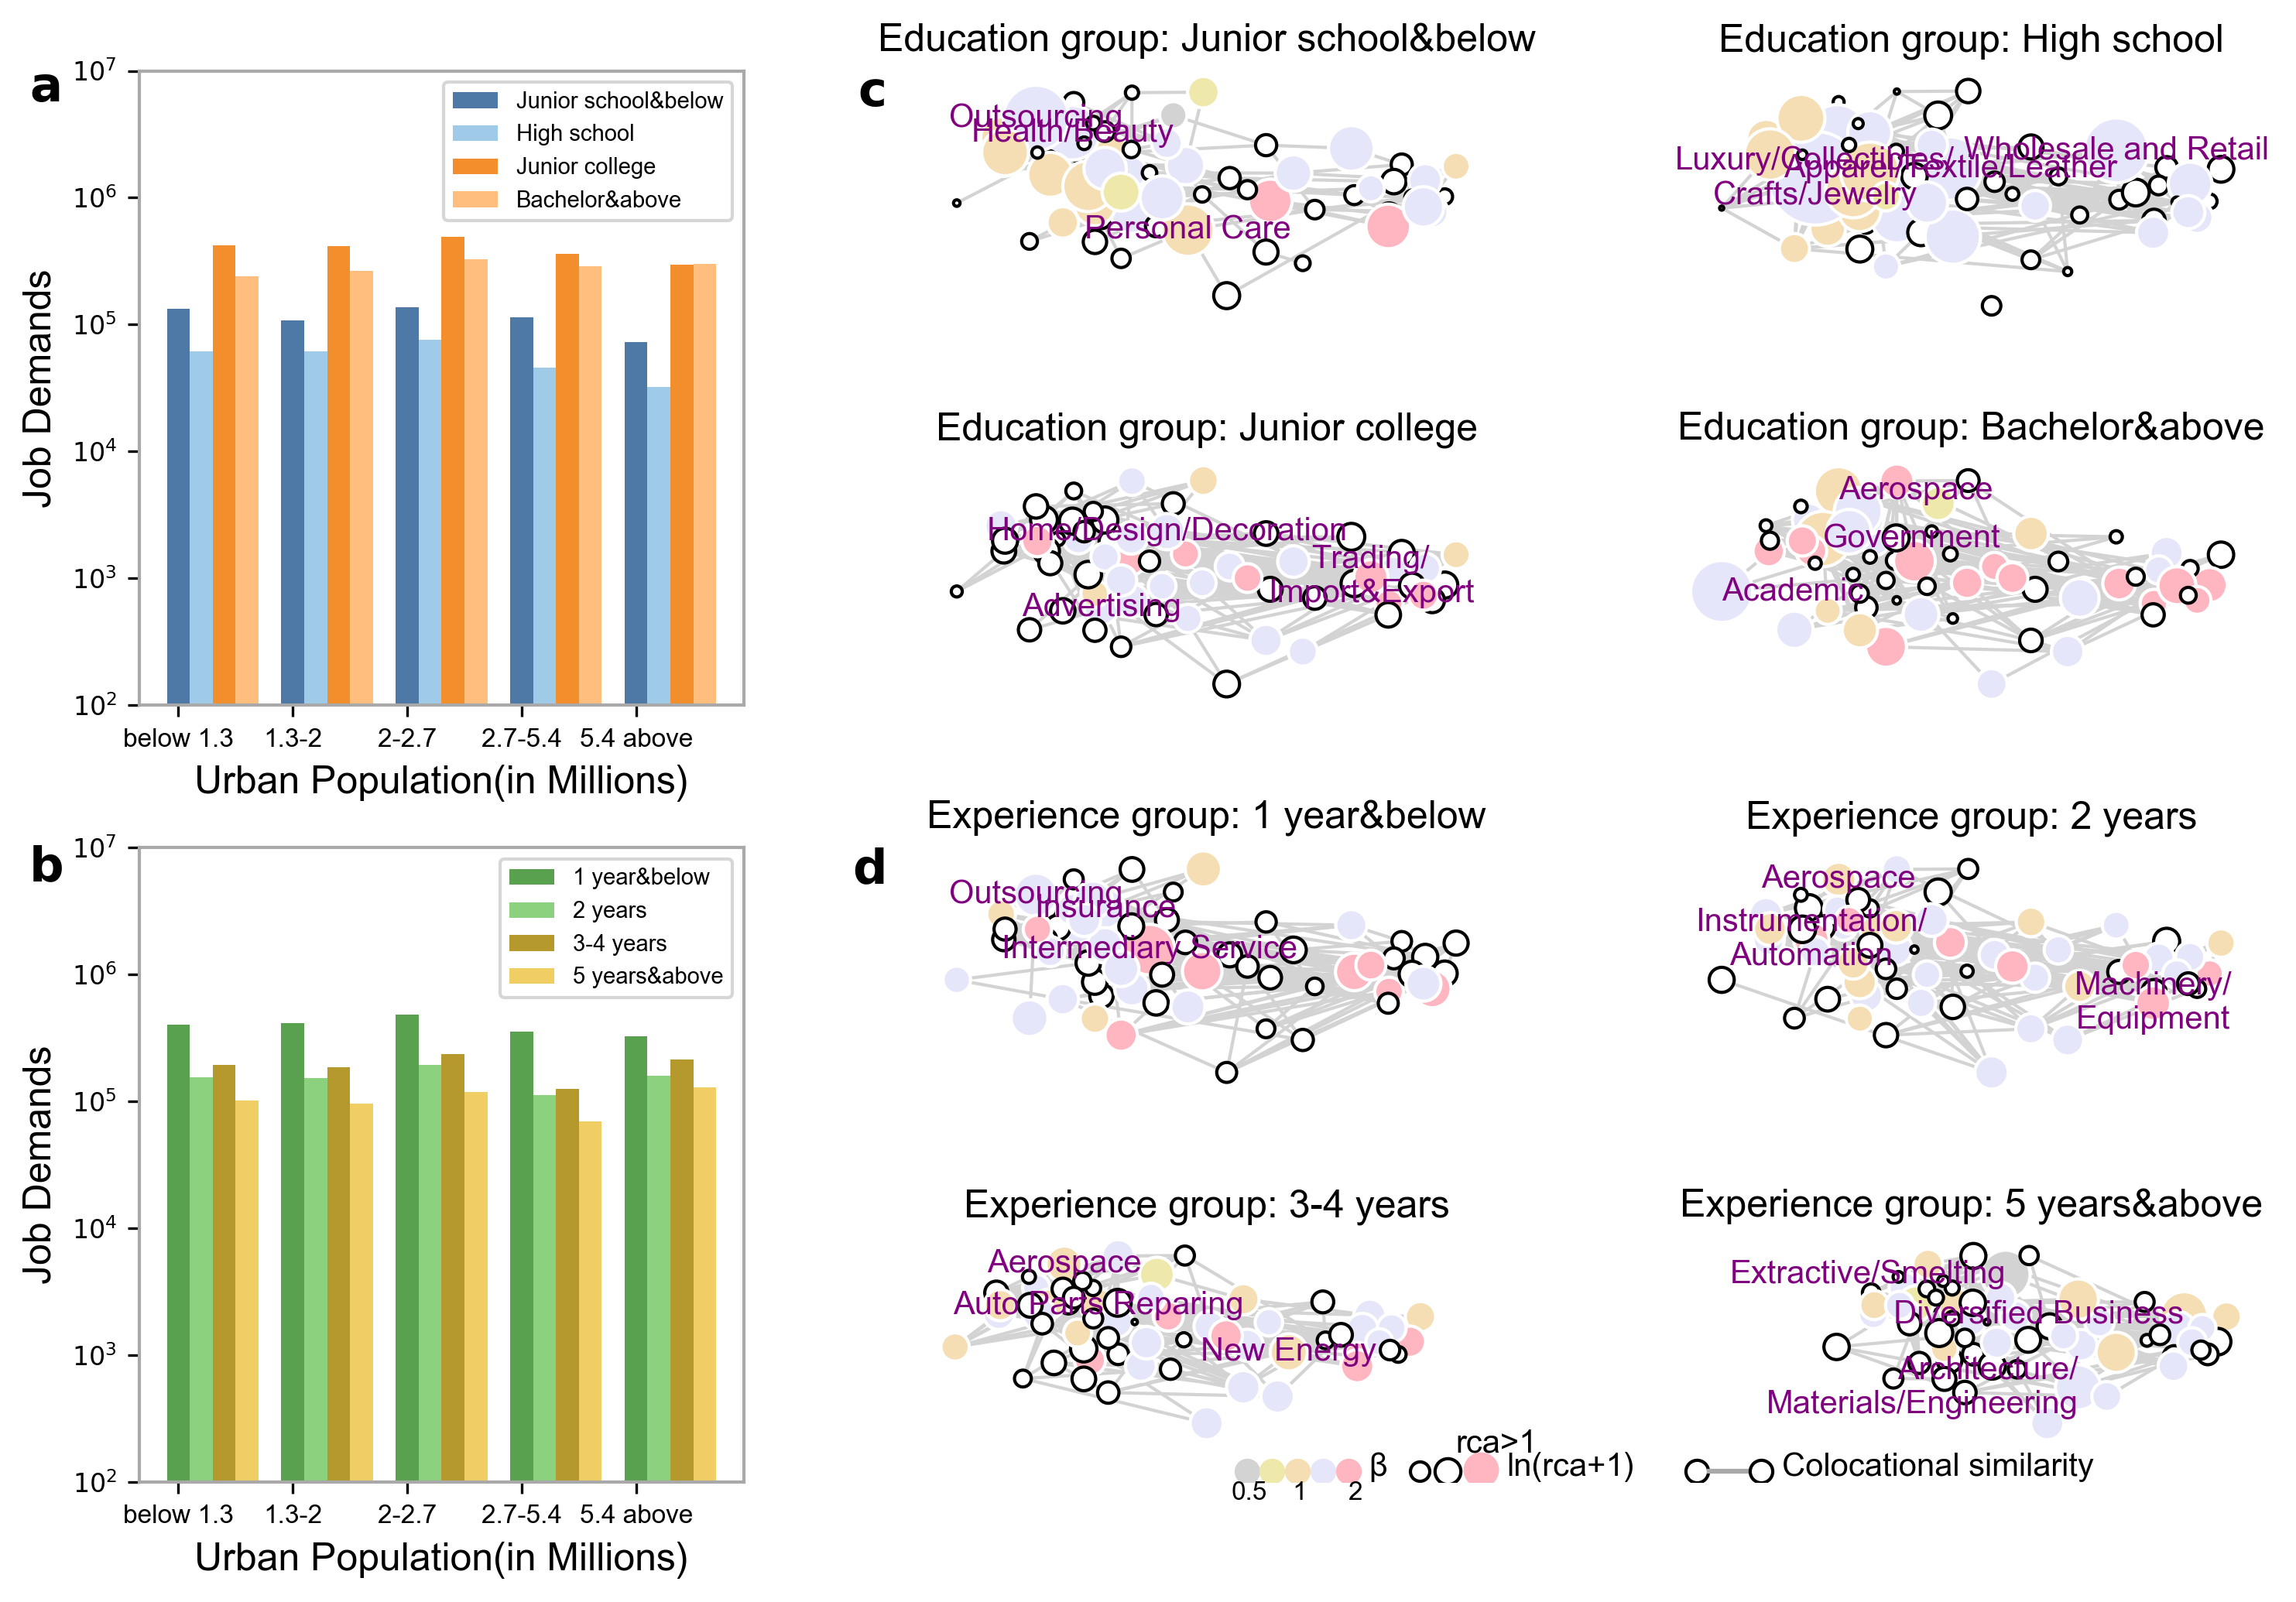

<Figure size 432x288 with 0 Axes>

In [13]:
import networkx as nx
fig=plt.figure(figsize=(10,7),dpi=300)
ax1=plt.subplot2grid((4,3),(0,0),rowspan=2,colspan=1)#学历bar
df1=df[['edu','city','urban2020']]
df1=df1[df1['urban2020']>0]
df1=df1[df1['edu']!='-1']
df1=df1[df1['edu']!='在校生/应届生']
mp={'本科':'本科及以上','中技':'初中及以下','中专':'初中及以下','中技/中专':'初中及以下',
   '大专':'大专','高中':'高中','硕士':'本科及以上','博士':'本科及以上','初中及以下':'初中及以下'}
df1['edu'] = df1['edu'].map(mp)
mp={'初中及以下':'Junior school and below','高中':'High school',
    '大专':'Junior college','本科及以上':'Bachelor degree and above'}
df1['edu']=df1['edu'].map(mp)
listlabels=[str(5-i) for i in range(5)]
df1['citygroups'] = pd.qcut(df1['urban2020'], q=5, labels=listlabels)
df11=df1.groupby(['citygroups','edu']).count()['city'].reset_index()
df11=df11.rename(columns={'city':'number'})
mp={'5':'130万以下','4':'130-200万','3':'200-270万','2':'270-540万','1':'540万以上'}
df11['citygroups']=df11['citygroups'].map(mp)
mp={'130万以下':'below 1.3 million','130-200万':'1.3-2 million',
    '200-270万':'2-2.7 million','270-540万':'2.7-5.4 million','540万以上':'5.4 million and above'}
df11['citygroups']=df11['citygroups'].map(mp)
mp={'Junior school and below':7,'High school':12,'Junior college':15,'Bachelor degree and above':16}
df11['eduy']=df11['edu'].map(mp)
df11.sort_values(['citygroups','eduy'],inplace=True,ascending=True,na_position='first')
df11= pd.crosstab(index=df11['citygroups'],columns=df11['eduy'],values=df11['number'],aggfunc=np.sum)
df11=df11.rename(columns={7:'Junior school and below',12:'High school',15:'Junior college',
                            16:'Bachelor degree and above'})
import math
df11['Junior school and below']=df11['Junior school and below'].apply(lambda x:np.log(x))
df11['High school']=df11['High school'].apply(lambda x:np.log(x))
df11['Junior college']=df11['Junior college'].apply(lambda x:np.log(x))
df11['Bachelor degree and above']=df11['Bachelor degree and above'].apply(lambda x:np.log(x))
name_list = ['below 1.3', '1.3-2', '2-2.7', '2.7-5.4', '5.4 above']
x = list(range(len(name_list)))
heights1= list(df11['Junior school and below'])
heights2=list(df11['High school'])
heights3=list(df11['Junior college'])
heights4=list(df11['Bachelor degree and above'])
total_width,n=0.8,4
width = total_width / n
colors = plt.cm.autumn_r(np.linspace(0,1,7))
plt.bar(x, heights1,width=width,tick_label=name_list,color="#4E79A7",label='Junior school&below')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, heights2, width=width,color='#A0CBE8',label='High school')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, heights3, width=width, color='#F28E2B',label='Junior college')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, heights4,width=width, color='#FFBE7D',label='Bachelor&above')
plt.ylabel("Job Demands",fontsize=12)
plt.xlabel("Urban Population(in Millions)",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.legend(loc=1,fontsize=15)
plt.xticks(rotation=360)
bwith = 1 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)#图框下边
TK.spines['left'].set_linewidth(bwith)#图框左边
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
bcolor = 'darkgray'
TK = plt.gca()#获取边框
TK.spines['bottom'].set_color(bcolor)#图框下边
TK.spines['left'].set_color(bcolor)#图框左边
TK.spines['top'].set_color(bcolor)#图框上边
TK.spines['right'].set_color(bcolor)#图框右边
plt.legend(loc=1,fontsize=7)
ax1.set_yticks([np.log(1e3/100),np.log(1e4/100),np.log(1e5/100),np.log(1e6/100),np.log(1e7/100),np.log(1e8/100),np.log(1e9/100)]) #设定y轴刻度，并均匀分布
ax1.set_yticklabels(["$10^1$","$10^2$","$10^3$","$10^4$","$10^5$","$10^6$","$10^7$"]) 
ax1.set_ylim(np.log(1e4/100),np.log(1e9/100))
ax1.text(-1.3, np.log(1e9/90), "a", fontsize=15,fontweight='extra bold',fontproperties='DejaVu Sans', ha="left", va="top") 
plt.tight_layout()

ax2=plt.subplot2grid((4,3),(2,0),rowspan=2,colspan=1)#经验bar
df2=df[['exp','city','urban2020']]
df2=df2[df2['urban2020']>0]
len(df2)
df2=df2[df2['exp']!='-1']
len(df2)
mp={'2年经验':'2年','1年经验':'1年及以下','无需经验':'1年及以下','3-4年经验':'3-4年',
   '5-7年经验':'5年及以上','8-9年经验':'5年及以上','10年以上经验':'5年及以上'}
df2['exp']=df2['exp'].map(mp)
mp={'2年':'2 years','3-4年':'3-4 years',
    '1年及以下':'1 year and below','5年及以上':'5 years and above'}
df2['exp']=df2['exp'].map(mp)

listlabels=[str(5-i) for i in range(5)]
listlabels
df2['citygroups'] = pd.qcut(df2['urban2020'], q=5, labels=listlabels)
df22=df2.groupby(['citygroups','exp']).count()['city'].reset_index()
df22.head()
df22=df22.rename(columns={'city':'number'})

mp={'5':'130万以下','4':'130-200万','3':'200-270万',
                            '2':'270-540万','1':'540万以上'}
df22['citygroups']=df22['citygroups'].map(mp)
mp={'130万以下':'below 1.3 million','130-200万':'1.3-2 million',
    '200-270万':'2-2.7 million','270-540万':'2.7-5.4 million','540万以上':'5.4 million and above'}
df22['citygroups']=df22['citygroups'].map(mp)
mp={'1 year and below':2,'2 years':3,'3-4 years':5,
                            '5 years and above':8}
df22['expy']=df22['exp'].map(mp)
df22.sort_values(['citygroups','expy'],inplace=True,ascending=True,na_position='first')

df22=pd.crosstab(index=df22['citygroups'],columns=df22['expy'],values=df22['number'],aggfunc=np.sum)
df22=df22.rename(columns={2:'1 year and below',3:'2 years',5:'3-4 years',
                           8:'5 years and above'})
import math
df22['1 year and below']=df22['1 year and below'].apply(lambda x:np.log(x))
df22['2 years']=df22['2 years'].apply(lambda x:np.log(x))
df22['3-4 years']=df22['3-4 years'].apply(lambda x:np.log(x))
df22['5 years and above']=df22['5 years and above'].apply(lambda x:np.log(x))
name_list = ['below 1.3', '1.3-2', '2-2.7', '2.7-5.4', '5.4 above']
x = list(range(len(name_list)))
heights1= list(df22['1 year and below'])
heights2=list(df22['2 years'])
heights3=list(df22['3-4 years'])
heights4=list(df22['5 years and above'])
total_width,n=0.8,4
width = total_width / n
colors = plt.cm.Blues(np.linspace(0,1,7))
plt.bar(x, heights1,width=width,tick_label=name_list,color='#59A14F',label='1 year&below')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, heights2, width=width,color='#8CD17D',label='2 years')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, heights3, width=width,color='#B6992D',label='3-4 years')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, heights4,width=width,color='#F1CE63',label='5 years&above')
plt.ylabel("Job Demands",fontsize=12)
plt.xlabel("Urban Population(in Millions)",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.legend(loc=1,fontsize=15)
plt.xticks(rotation=360)
bwith = 1 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)#图框下边
TK.spines['left'].set_linewidth(bwith)#图框左边
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
bcolor = 'darkgray'
TK = plt.gca()#获取边框
TK.spines['bottom'].set_color(bcolor)#图框下边
TK.spines['left'].set_color(bcolor)#图框左边
TK.spines['top'].set_color(bcolor)#图框上边
TK.spines['right'].set_color(bcolor)#图框右边
plt.legend(loc=1,fontsize=7)
ax2.set_yticks([np.log(1e3/100),np.log(1e4/100),np.log(1e5/100),np.log(1e6/100),np.log(1e7/100),np.log(1e8/100),np.log(1e9/100)]) #设定y轴刻度，并均匀分布
ax2.set_yticklabels(["$10^1$","$10^2$","$10^3$","$10^4$","$10^5$","$10^6$","$10^7$"]) 
ax2.set_ylim(np.log(1e4/100),np.log(1e9/100))
ax2.text(-1.3, np.log(1e9/95), "b", fontsize=15,fontweight='extra bold',fontproperties='DejaVu Sans', ha="left", va="top") 
plt.tight_layout()



ax3=plt.subplot2grid((4,3),(0,1),rowspan=1,colspan=1)#初中及以下
mp={'本科':'本科及以上','中技':'初中及以下','中专':'初中及以下','中技/中专':'初中及以下',
   '大专':'大专','高中':'高中','硕士':'本科及以上','博士':'本科及以上','初中及以下':'初中及以下'}
df['edu'] = df['edu'].map(mp)
mp={'初中及以下':'Junior school and below','高中':'High school',
    '大专':'Junior college','本科及以上':'Bachelor degree and above'}
df['edu']=df['edu'].map(mp)
##########mp
df['industry']=df['industry'].map(mp1)
#计算rca
dff=df[df['edu']=='Junior school and below']

len(dff)
dff=dff.groupby(['industry','city']).count().reset_index()
dff=dff[['industry','city','jobtype']]
dff=dff.rename(columns={'jobtype':'number'})
dff.head()
data=pd.crosstab(index=dff['city'],columns=dff['industry'],values=dff['number'],aggfunc=np.sum,margins=True,normalize='index')
data=data.div(data.loc["All",])
#计算scaling
dd=pd.read_excel('/Users/nannanzhao/Dropbox/JobsComplexity/data/complexity/2020data.xls')
dd=dd[['city','urban2020']]
dd=dd.drop_duplicates()
dd.head()
join=pd.merge(dd,dff,left_on='city',right_on='city')
join.head()
join=join[join['number']>0]
len(join)
join['number']=join['number']/10000
join.head()
industry_stats = defaultdict(list)
for item in join[['city','industry','urban2020','number']].values:
    city,indus,city_urban,city_employ = item
    if city_urban!=np.nan and city_employ!=np.nan: #去掉小于等于0.01，0.02的employ，不影响基本的趋势
        industry_stats[indus].append([city,city_urban,city_employ])
i=0
R = []
for k in industry_stats:
    i+=1
    citys,xx,yy = list(zip(*industry_stats[k]))
    xx =np.array(xx)
    yy = np.array(yy)
    dd = [[np.log10(x),np.log10(yy[ii])] for ii,x in enumerate(xx)] # shouldn't add 0.1
    data1 = pd.DataFrame(dd,columns=['log_pop','log_jobn'])
    model = ols("log_jobn ~ log_pop ",data=data1).fit()
    
    beta = np.round(model.params.log_pop,3)
    R.append([beta,k,model.rsquared])
R = sorted(R)
sf = pd.DataFrame(R,columns=['beta','industry','r2'])
sf.head()
#合并规模系数和相对比较优势
combine=pd.merge(join,sf,left_on='industry',right_on='industry')
combine.head()
indus=list(Counter(combine['industry']).keys())
len(indus)
combine=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine['rca']=rca
combine2=pd.merge(join,sf,left_on='industry',right_on='industry')
combine2=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine2[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine2['rca']=rca
combine['rca'] = combine['rca'].apply(lambda x:np.log10(x+1))
ds=combine2.groupby(['industry']).mean()['rca'].reset_index()
dt=pd.crosstab(index=combine['city'],columns=combine['industry'],values=combine['rca'],aggfunc=np.sum, margins=False,normalize='index')
dd=dt.corr()
cc=dd.values
np.fill_diagonal(cc, 0)
import networkx as nx
coword_names = dt.columns.values[0:]
#print("There are ", len(coword_names), " words")
coword_names
graph_pearson_corr = nx.from_numpy_array(cc)
#print(nx.info(graph_pearson_corr))
coword_labels = {}
for idx, node in enumerate(graph_pearson_corr.nodes()): 
    #print("idx=", idx, "; node=", node)
    coword_labels[node] = coword_names[idx]
graph_pearson_corr = nx.relabel_nodes(graph_pearson_corr, coword_labels)
#sorted(graph_pearson_corr)
coword_per2 = np.percentile(dd, 90)
coword_per2
graph_pearson_corr_per2 = graph_pearson_corr.copy()
graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w 
                                           in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
nodelist1 = dict(zip(eduu1['industry'],eduu1['edu_rca']))
nodesizes1=[]
for node in nodelist1:
    if node in graph_pearson_corr_per2.nodes():
        nodesizes1.append(pow(nodelist1[node],2)*70)
#print(nodesizes1)
eduu11=eduu1[eduu1['edu_rca']>np.percentile(eduu1['edu_rca'], 95)]
coword_names2 = eduu11['industry'].values
labellist1=dict(zip(coword_names2,coword_names2))

combineb=combine[['industry','beta']].drop_duplicates()
len(combineb)
betalist=dict(zip(combineb['industry'],combineb['beta']))
color_map = []
for node in nodelist1:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist1[node] < 1:
            color_map.append('white')
        else: 
            if node in betalist:
                if betalist[node]>0 and betalist[node]<0.5:
                    color_map.append('lightgrey')
                elif betalist[node]>0.5 and betalist[node]<1:
                    color_map.append('palegoldenrod')
                elif betalist[node]>1 and betalist[node]<1.5:
                    color_map.append('wheat')
                elif betalist[node]>1.5 and betalist[node]<2:
                    color_map.append('lavender')
                else:
                    color_map.append('lightpink') 
edgecolor = []
for node in nodelist1:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist1[node] < 1:
            edgecolor.append('black')
        else: 
            if node in betalist:
                edgecolor.append('white')
                    
#graph_pearson_corr_per2 = graph_pearson_corr.copy()
#graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
#pos = nx.spring_layout(graph_pearson_corr_per2)
#plt.figure(1,figsize=(15,15)) 
nx.draw(graph_pearson_corr_per2, pos=pos1,node_shape='o' ,node_size=nodesizes1, edgecolors=edgecolor,
        node_color=color_map,edge_color='lightgrey',labels=labellist1,horizontalalignment="center", font_size=10, font_color="purple")

ax3.set_title('Education group: Junior school&below',loc='center',fontsize=12)
ax3.text(-1.1, .95, "c",fontsize=15, fontweight='extra bold',fontproperties='DejaVu Sans', ha="right", va="top") 
plt.tight_layout()


ax4=plt.subplot2grid((4,3),(0,2),rowspan=1,colspan=1)#高中
#计算rca
dff=df[df['edu']=='High school']
len(dff)
dff=dff.groupby(['industry','city']).count().reset_index()
dff=dff[['industry','city','jobtype']]
dff=dff.rename(columns={'jobtype':'number'})
dff.head()
data=pd.crosstab(index=dff['city'],columns=dff['industry'],values=dff['number'],aggfunc=np.sum,margins=True,normalize='index')
data=data.div(data.loc["All",])
#计算scaling
dd=pd.read_excel('/Users/nannanzhao/Dropbox/JobsComplexity/data/complexity/2020data.xls')
dd=dd[['city','urban2020']]
dd=dd.drop_duplicates()
#dd.head()
join=pd.merge(dd,dff,left_on='city',right_on='city')
#join.head()
join=join[join['number']>0]
#len(join)
join['number']=join['number']/10000
join.head()
industry_stats = defaultdict(list)
for item in join[['city','industry','urban2020','number']].values:
    city,indus,city_urban,city_employ = item
    if city_urban!=np.nan and city_employ!=np.nan: #去掉小于等于0.01，0.02的employ，不影响基本的趋势
        industry_stats[indus].append([city,city_urban,city_employ])
i=0
R = []
for k in industry_stats:
    i+=1
    citys,xx,yy = list(zip(*industry_stats[k]))
    xx =np.array(xx)
    yy = np.array(yy)
    dd = [[np.log10(x),np.log10(yy[ii])] for ii,x in enumerate(xx)] # shouldn't add 0.1
    data1 = pd.DataFrame(dd,columns=['log_pop','log_jobn'])
    model = ols("log_jobn ~ log_pop ",data=data1).fit()
    
    beta = np.round(model.params.log_pop,3)
    R.append([beta,k,model.rsquared])
R = sorted(R)
sf = pd.DataFrame(R,columns=['beta','industry','r2'])
sf.head()
#合并规模系数和相对比较优势
combine=pd.merge(join,sf,left_on='industry',right_on='industry')
combine.head()
indus=list(Counter(combine['industry']).keys())
len(indus)
combine=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine['rca']=rca
combine2=pd.merge(join,sf,left_on='industry',right_on='industry')
combine2=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine2[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine2['rca']=rca
combine['rca'] = combine['rca'].apply(lambda x:np.log10(x+1))
ds=combine2.groupby(['industry']).mean()['rca'].reset_index()
dt=pd.crosstab(index=combine['city'],columns=combine['industry'],values=combine['rca'],aggfunc=np.sum, margins=False,normalize='index')
dd=dt.corr()
cc=dd.values
np.fill_diagonal(cc, 0)
#cc
coword_names = dt.columns.values[0:]
#print("There are ", len(coword_names), " words")
#coword_names
graph_pearson_corr = nx.from_numpy_array(cc)
#print(nx.info(graph_pearson_corr))
coword_labels = {}
for idx, node in enumerate(graph_pearson_corr.nodes()): 
    #print("idx=", idx, "; node=", node)
    coword_labels[node] = coword_names[idx]
graph_pearson_corr = nx.relabel_nodes(graph_pearson_corr, coword_labels)
#sorted(graph_pearson_corr)
coword_per2 = np.percentile(dd, 90)
coword_per2
graph_pearson_corr_per2 = graph_pearson_corr.copy()
graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w 
                                           in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
nodelist2 = dict(zip(eduu2['industry'],eduu2['edu_rca']))
nodesizes2=[]
for node in nodelist2:
    if node in graph_pearson_corr_per2.nodes():
        nodesizes2.append(pow(nodelist2[node],2)*70)
eduu22=eduu2[eduu2['edu_rca']>np.percentile(eduu2['edu_rca'], 95)]
coword_names2 = eduu22['industry'].values
labellist2=dict(zip(coword_names2,coword_names2))

combineb=combine[['industry','beta']].drop_duplicates()
len(combineb)
betalist=dict(zip(combineb['industry'],combineb['beta']))
color_map = []
for node in nodelist2:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist2[node] < 1:
            color_map.append('white')
        else: 
            if node in betalist:
                if betalist[node]>0 and betalist[node]<0.5:
                    color_map.append('lightgrey')
                elif betalist[node]>0.5 and betalist[node]<1:
                    color_map.append('palegoldenrod')
                elif betalist[node]>1 and betalist[node]<1.5:
                    color_map.append('wheat')
                elif betalist[node]>1.5 and betalist[node]<2:
                    color_map.append('lavender')
                else:
                    color_map.append('lightpink') 
edgecolor = []
for node in nodelist2:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist2[node] < 1:
            edgecolor.append('black')
        else: 
            if node in betalist:
                edgecolor.append('white') 
                        
#graph_pearson_corr_per2 = graph_pearson_corr.copy()
#graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
#pos = nx.spring_layout(graph_pearson_corr_per2)
#plt.figure(1,figsize=(15,15)) 
nx.draw(graph_pearson_corr_per2, pos=pos1,node_shape='o' ,node_size=nodesizes2, edgecolors=edgecolor,
        node_color=color_map,edge_color='lightgrey',labels=labellist2,horizontalalignment="center", font_size=10, font_color="purple")
#cmp=plt.cm.cool
#cmp
#plt.show()
ax4.set_title('Education group: High school',loc='center',fontsize=12)
plt.tight_layout()




ax5=plt.subplot2grid((4,3),(1,1),rowspan=1,colspan=1)#大专
#计算rca
dff=df[df['edu']=='Junior college']
len(dff)
dff=dff.groupby(['industry','city']).count().reset_index()
dff=dff[['industry','city','jobtype']]
dff=dff.rename(columns={'jobtype':'number'})
dff.head()
data=pd.crosstab(index=dff['city'],columns=dff['industry'],values=dff['number'],aggfunc=np.sum,margins=True,normalize='index')
data=data.div(data.loc["All",])
#计算scaling
dd=pd.read_excel('/Users/nannanzhao/Dropbox/JobsComplexity/data/complexity/2020data.xls')
dd=dd[['city','urban2020']]
dd=dd.drop_duplicates()
#dd.head()
join=pd.merge(dd,dff,left_on='city',right_on='city')
join.head()
join=join[join['number']>0]
#len(join)
join['number']=join['number']/10000
#join.head()
industry_stats = defaultdict(list)
for item in join[['city','industry','urban2020','number']].values:
    city,indus,city_urban,city_employ = item
    if city_urban!=np.nan and city_employ!=np.nan: #去掉小于等于0.01，0.02的employ，不影响基本的趋势
        industry_stats[indus].append([city,city_urban,city_employ])
i=0
R = []
for k in industry_stats:
    i+=1
    citys,xx,yy = list(zip(*industry_stats[k]))
    xx =np.array(xx)
    yy = np.array(yy)
    dd = [[np.log10(x),np.log10(yy[ii])] for ii,x in enumerate(xx)] # shouldn't add 0.1
    data1 = pd.DataFrame(dd,columns=['log_pop','log_jobn'])
    model = ols("log_jobn ~ log_pop ",data=data1).fit()
    
    beta = np.round(model.params.log_pop,3)
    R.append([beta,k,model.rsquared])
R = sorted(R)
sf = pd.DataFrame(R,columns=['beta','industry','r2'])
sf.head()
#合并规模系数和相对比较优势
combine=pd.merge(join,sf,left_on='industry',right_on='industry')
combine.head()
indus=list(Counter(combine['industry']).keys())
#len(indus)
combine=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine['rca']=rca
combine2=pd.merge(join,sf,left_on='industry',right_on='industry')
combine2=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine2[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine2['rca']=rca
combine['rca'] = combine['rca'].apply(lambda x:np.log10(x+1))
ds=combine2.groupby(['industry']).mean()['rca'].reset_index()
dt=pd.crosstab(index=combine['city'],columns=combine['industry'],values=combine['rca'],aggfunc=np.sum, margins=False,normalize='index')
dd=dt.corr()
cc=dd.values
np.fill_diagonal(cc, 0)
cc
coword_names = dt.columns.values[0:]
#print("There are ", len(coword_names), " words")
#coword_names
graph_pearson_corr = nx.from_numpy_array(cc)
#print(nx.info(graph_pearson_corr))
coword_labels = {}
for idx, node in enumerate(graph_pearson_corr.nodes()): 
    #print("idx=", idx, "; node=", node)
    coword_labels[node] = coword_names[idx]
graph_pearson_corr = nx.relabel_nodes(graph_pearson_corr, coword_labels)
#sorted(graph_pearson_corr)
coword_per2 = np.percentile(dd, 90)
#coword_per2
graph_pearson_corr_per2 = graph_pearson_corr.copy()
graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w 
                                           in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
nodelist3 = dict(zip(eduu3['industry'],eduu3['edu_rca']))
nodesizes3=[]
for node in nodelist3:
    if node in graph_pearson_corr_per2.nodes():
        nodesizes3.append(pow(nodelist3[node],2)*70)
eduu33=eduu3[eduu3['edu_rca']>np.percentile(eduu3['edu_rca'], 95)]
coword_names2 = eduu33['industry'].values
labellist3=dict(zip(coword_names2,coword_names2))

combineb=combine[['industry','beta']].drop_duplicates()
#len(combineb)
betalist=dict(zip(combineb['industry'],combineb['beta']))
color_map = []
for node in nodelist3:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist3[node] < 1:
            color_map.append('white')
        else: 
            if node in betalist:
                if betalist[node]>0 and betalist[node]<0.5:
                    color_map.append('lightgrey')
                elif betalist[node]>0.5 and betalist[node]<1:
                    color_map.append('palegoldenrod')
                elif betalist[node]>1 and betalist[node]<1.5:
                    color_map.append('wheat')
                elif betalist[node]>1.5 and betalist[node]<2:
                    color_map.append('lavender')
                else:
                    color_map.append('lightpink') 
edgecolor = []
for node in nodelist3:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist3[node] < 1:
            edgecolor.append('black')
        else: 
            if node in betalist:
                edgecolor.append('white')
                    

nx.draw(graph_pearson_corr_per2, pos=pos1,node_shape='o' ,node_size=nodesizes3,edgecolors=edgecolor,
        node_color=color_map,edge_color='lightgrey',labels=labellist3,horizontalalignment="center", font_size=10, font_color="purple")

ax5.set_title('Education group: Junior college',loc='center',fontsize=12)
plt.tight_layout()



ax6=plt.subplot2grid((4,3),(1,2),rowspan=1,colspan=1)#本科
#计算rca
dff=df[df['edu']=='Bachelor degree and above']
len(dff)
dff=dff.groupby(['industry','city']).count().reset_index()
dff=dff[['industry','city','jobtype']]
dff=dff.rename(columns={'jobtype':'number'})
dff.head()
data=pd.crosstab(index=dff['city'],columns=dff['industry'],values=dff['number'],aggfunc=np.sum,margins=True,normalize='index')
data=data.div(data.loc["All",])
#计算scaling
dd=pd.read_excel('/Users/nannanzhao/Dropbox/JobsComplexity/data/complexity/2020data.xls')
dd=dd[['city','urban2020']]
dd=dd.drop_duplicates()
dd.head()
join=pd.merge(dd,dff,left_on='city',right_on='city')
join.head()
join=join[join['number']>0]
len(join)
join['number']=join['number']/10000
join.head()
industry_stats = defaultdict(list)
for item in join[['city','industry','urban2020','number']].values:
    city,indus,city_urban,city_employ = item
    if city_urban!=np.nan and city_employ!=np.nan: #去掉小于等于0.01，0.02的employ，不影响基本的趋势
        industry_stats[indus].append([city,city_urban,city_employ])
i=0
R = []
for k in industry_stats:
    i+=1
    citys,xx,yy = list(zip(*industry_stats[k]))
    xx =np.array(xx)
    yy = np.array(yy)
    dd = [[np.log10(x),np.log10(yy[ii])] for ii,x in enumerate(xx)] # shouldn't add 0.1
    data1 = pd.DataFrame(dd,columns=['log_pop','log_jobn'])
    model = ols("log_jobn ~ log_pop ",data=data1).fit()
    
    beta = np.round(model.params.log_pop,3)
    R.append([beta,k,model.rsquared])
R = sorted(R)
sf = pd.DataFrame(R,columns=['beta','industry','r2'])
sf.head()
#合并规模系数和相对比较优势
combine=pd.merge(join,sf,left_on='industry',right_on='industry')
combine.head()
indus=list(Counter(combine['industry']).keys())
len(indus)
combine=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine['rca']=rca
combine2=pd.merge(join,sf,left_on='industry',right_on='industry')
combine2=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine2[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine2['rca']=rca
combine['rca'] = combine['rca'].apply(lambda x:np.log10(x+1))
ds=combine2.groupby(['industry']).mean()['rca'].reset_index()
dt=pd.crosstab(index=combine['city'],columns=combine['industry'],values=combine['rca'],aggfunc=np.sum, margins=False,normalize='index')
dd=dt.corr()
cc=dd.values
np.fill_diagonal(cc, 0)
cc
coword_names = dt.columns.values[0:]
#print("There are ", len(coword_names), " words")
coword_names
graph_pearson_corr = nx.from_numpy_array(cc)
#print(nx.info(graph_pearson_corr))
coword_labels = {}
for idx, node in enumerate(graph_pearson_corr.nodes()): 
    #print("idx=", idx, "; node=", node)
    coword_labels[node] = coword_names[idx]
graph_pearson_corr = nx.relabel_nodes(graph_pearson_corr, coword_labels)
#sorted(graph_pearson_corr)
coword_per2 = np.percentile(dd, 90)
coword_per2
graph_pearson_corr_per2 = graph_pearson_corr.copy()
graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w 
                                           in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
nodelist4 = dict(zip(eduu4['industry'],eduu4['edu_rca']))
nodesizes4=[]
for node in nodelist4:
    if node in graph_pearson_corr_per2.nodes():
        nodesizes4.append(pow(nodelist4[node],2)*70)
eduu44=eduu4[eduu4['edu_rca']>np.percentile(eduu4['edu_rca'], 95)]
coword_names2 = eduu44['industry'].values
labellist4=dict(zip(coword_names2,coword_names2))

combineb=combine[['industry','beta']].drop_duplicates()
len(combineb)
betalist=dict(zip(combineb['industry'],combineb['beta']))
color_map = []
for node in nodelist4:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist4[node] < 1:
            color_map.append('white')
        else:
            if node in betalist:
                if betalist[node]>0 and betalist[node]<0.5:
                    color_map.append('lightgrey')
                elif betalist[node]>0.5 and betalist[node]<1:
                    color_map.append('palegoldenrod')
                elif betalist[node]>1 and betalist[node]<1.5:
                    color_map.append('wheat')
                elif betalist[node]>1.5 and betalist[node]<2:
                    color_map.append('lavender')
                else:
                    color_map.append('lightpink') 
        
edgecolor = []
for node in nodelist4:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist4[node] < 1:
            edgecolor.append('black')
        else: 
            if node in betalist:
                edgecolor.append('white')
                    

#graph_pearson_corr_per2 = graph_pearson_corr.copy()
#graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
#pos = nx.spring_layout(graph_pearson_corr_per2)
#plt.figure(1,figsize=(15,15)) 
nx.draw(graph_pearson_corr_per2, pos=pos1,node_shape='o' ,node_size=nodesizes4,edgecolors=edgecolor, 
        node_color=color_map,edge_color='lightgrey',labels=labellist4,horizontalalignment="left", font_size=10, font_color="purple")
#cmp=plt.cm.cool
#cmp
#plt.show()
ax6.set_title('Education group: Bachelor&above',loc='center',fontsize=12)
plt.tight_layout()




ax7=plt.subplot2grid((4,3),(2,1),rowspan=1,colspan=1)#2年及以下
mp={'2年经验':'2年','1年经验':'1年及以下','无需经验':'1年及以下','3-4年经验':'3-4年',
   '5-7年经验':'5年及以上','8-9年经验':'5年及以上','10年以上经验':'5年及以上'}
df['exp']=df['exp'].map(mp)
mp={'2年':'2 years','3-4年':'3-4 years',
    '1年及以下':'1 year and below','5年及以上':'5 years and above'}
df['exp']=df['exp'].map(mp)

#计算rca
dff=df[df['exp']=='1 year and below']
len(dff)
dff=dff.groupby(['industry','city']).count().reset_index()
dff=dff[['industry','city','jobtype']]
dff=dff.rename(columns={'jobtype':'number'})
dff.head()
data=pd.crosstab(index=dff['city'],columns=dff['industry'],values=dff['number'],aggfunc=np.sum,margins=True,normalize='index')
data=data.div(data.loc["All",])
#计算scaling
dd=pd.read_excel('/Users/nannanzhao/Dropbox/JobsComplexity/data/complexity/2020data.xls')
dd=dd[['city','urban2020']]
dd=dd.drop_duplicates()
dd.head()
join=pd.merge(dd,dff,left_on='city',right_on='city')
join.head()
join=join[join['number']>0]
len(join)
join['number']=join['number']/10000
join.head()
industry_stats = defaultdict(list)
for item in join[['city','industry','urban2020','number']].values:
    city,indus,city_urban,city_employ = item
    if city_urban!=np.nan and city_employ!=np.nan: #去掉小于等于0.01，0.02的employ，不影响基本的趋势
        industry_stats[indus].append([city,city_urban,city_employ])
i=0
R = []
for k in industry_stats:
    i+=1
    citys,xx,yy = list(zip(*industry_stats[k]))
    xx =np.array(xx)
    yy = np.array(yy)
    dd = [[np.log10(x),np.log10(yy[ii])] for ii,x in enumerate(xx)] # shouldn't add 0.1
    data1 = pd.DataFrame(dd,columns=['log_pop','log_jobn'])
    model = ols("log_jobn ~ log_pop ",data=data1).fit()
    
    beta = np.round(model.params.log_pop,3)
    R.append([beta,k,model.rsquared])
R = sorted(R)
sf = pd.DataFrame(R,columns=['beta','industry','r2'])
sf.head()
#合并规模系数和相对比较优势
combine=pd.merge(join,sf,left_on='industry',right_on='industry')
combine.head()
indus=list(Counter(combine['industry']).keys())
len(indus)
combine=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine['rca']=rca
combine2=pd.merge(join,sf,left_on='industry',right_on='industry')
combine2=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine2[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine2['rca']=rca
combine['rca'] = combine['rca'].apply(lambda x:np.log10(x+1))
ds=combine2.groupby(['industry']).mean()['rca'].reset_index()
dt=pd.crosstab(index=combine['city'],columns=combine['industry'],values=combine['rca'],aggfunc=np.sum, margins=False,normalize='index')
dd=dt.corr()
cc=dd.values
np.fill_diagonal(cc, 0)
cc
coword_names = dt.columns.values[0:]
#print("There are ", len(coword_names), " words")
coword_names
graph_pearson_corr = nx.from_numpy_array(cc)
#print(nx.info(graph_pearson_corr))
coword_labels = {}
for idx, node in enumerate(graph_pearson_corr.nodes()): 
    #print("idx=", idx, "; node=", node)
    coword_labels[node] = coword_names[idx]
graph_pearson_corr = nx.relabel_nodes(graph_pearson_corr, coword_labels)
#sorted(graph_pearson_corr)
coword_per2 = np.percentile(dd, 90)
coword_per2
graph_pearson_corr_per2 = graph_pearson_corr.copy()
graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w 
                                           in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
nodelist1 = dict(zip(expp1['industry'],expp1['exp_rca']))
nodesizes1=[]
for node in nodelist1:
    if node in graph_pearson_corr_per2.nodes():
        nodesizes1.append(pow(nodelist1[node],2)*70)
expp11=expp1[expp1['exp_rca']>np.percentile(expp1['exp_rca'], 95)]
coword_names2 = expp11['industry'].values
labellist1=dict(zip(coword_names2,coword_names2))

combineb=combine[['industry','beta']].drop_duplicates()
len(combineb)
betalist=dict(zip(combineb['industry'],combineb['beta']))
color_map = []
for node in nodelist1:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist1[node] < 1:
            color_map.append('white')
        else: 
            if node in betalist:
                if betalist[node]>0 and betalist[node]<0.5:
                    color_map.append('lightgrey')
                elif betalist[node]>0.5 and betalist[node]<1:
                    color_map.append('palegoldenrod')
                elif betalist[node]>1 and betalist[node]<1.5:
                    color_map.append('wheat')
                elif betalist[node]>1.5 and betalist[node]<2:
                    color_map.append('lavender')
                else:
                    color_map.append('lightpink') 
edgecolor = []
for node in nodelist1:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist1[node] < 1:
            edgecolor.append('black')
        else: 
            if node in betalist:
                edgecolor.append('white')
                    

nx.draw(graph_pearson_corr_per2, pos=pos1,node_shape='o' ,node_size=nodesizes1, edgecolors=edgecolor,
        node_color=color_map,edge_color='lightgrey',labels=labellist1,horizontalalignment="center", font_size=10, font_color="purple")
#plt.show()
ax7.set_title('Experience group: 1 year&below',loc='center',fontsize=12)
ax7.text(-1.1, .95, "d",fontsize=15, fontweight='extra bold',fontproperties='DejaVu Sans', ha="right", va="top") 
plt.tight_layout()





ax8=plt.subplot2grid((4,3),(2,2),rowspan=1,colspan=1)#3-4年
#计算rca
dff=df[df['exp']=='2 years']
len(dff)
dff=dff.groupby(['industry','city']).count().reset_index()
dff=dff[['industry','city','jobtype']]
dff=dff.rename(columns={'jobtype':'number'})
dff.head()
data=pd.crosstab(index=dff['city'],columns=dff['industry'],values=dff['number'],aggfunc=np.sum,margins=True,normalize='index')
data=data.div(data.loc["All",])
#计算scaling
dd=pd.read_excel('/Users/nannanzhao/Dropbox/JobsComplexity/data/complexity/2020data.xls')
dd=dd[['city','urban2020']]
dd=dd.drop_duplicates()
dd.head()
join=pd.merge(dd,dff,left_on='city',right_on='city')
join.head()
join=join[join['number']>0]
len(join)
join['number']=join['number']/10000
join.head()
industry_stats = defaultdict(list)
for item in join[['city','industry','urban2020','number']].values:
    city,indus,city_urban,city_employ = item
    if city_urban!=np.nan and city_employ!=np.nan: #去掉小于等于0.01，0.02的employ，不影响基本的趋势
        industry_stats[indus].append([city,city_urban,city_employ])
i=0
R = []
for k in industry_stats:
    i+=1
    citys,xx,yy = list(zip(*industry_stats[k]))
    xx =np.array(xx)
    yy = np.array(yy)
    dd = [[np.log10(x),np.log10(yy[ii])] for ii,x in enumerate(xx)] # shouldn't add 0.1
    data1 = pd.DataFrame(dd,columns=['log_pop','log_jobn'])
    model = ols("log_jobn ~ log_pop ",data=data1).fit()
    
    beta = np.round(model.params.log_pop,3)
    R.append([beta,k,model.rsquared])
R = sorted(R)
sf = pd.DataFrame(R,columns=['beta','industry','r2'])
sf.head()
#合并规模系数和相对比较优势
combine=pd.merge(join,sf,left_on='industry',right_on='industry')
combine.head()
indus=list(Counter(combine['industry']).keys())
len(indus)
combine=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine['rca']=rca
combine2=pd.merge(join,sf,left_on='industry',right_on='industry')
combine2=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine2[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine2['rca']=rca
combine['rca'] = combine['rca'].apply(lambda x:np.log10(x+1))
ds=combine2.groupby(['industry']).mean()['rca'].reset_index()
dt=pd.crosstab(index=combine['city'],columns=combine['industry'],values=combine['rca'],aggfunc=np.sum, margins=False,normalize='index')
dd=dt.corr()
cc=dd.values
np.fill_diagonal(cc, 0)
cc
coword_names = dt.columns.values[0:]
#print("There are ", len(coword_names), " words")
coword_names
graph_pearson_corr = nx.from_numpy_array(cc)
#print(nx.info(graph_pearson_corr))
coword_labels = {}
for idx, node in enumerate(graph_pearson_corr.nodes()): 
    #print("idx=", idx, "; node=", node)
    coword_labels[node] = coword_names[idx]
graph_pearson_corr = nx.relabel_nodes(graph_pearson_corr, coword_labels)
#sorted(graph_pearson_corr)
coword_per2 = np.percentile(dd, 90)
coword_per2
graph_pearson_corr_per2 = graph_pearson_corr.copy()
graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w 
                                           in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
nodelist2 = dict(zip(expp2['industry'],expp2['exp_rca']))
nodesizes2=[]
for node in nodelist2:
    if node in graph_pearson_corr_per2.nodes():
        nodesizes2.append(pow(nodelist2[node],2)*70)
expp22=expp2[expp2['exp_rca']>np.percentile(expp2['exp_rca'], 95)]
coword_names2 = expp22['industry'].values
labellist2=dict(zip(coword_names2,coword_names2))

combineb=combine[['industry','beta']].drop_duplicates()
len(combineb)
betalist=dict(zip(combineb['industry'],combineb['beta']))
color_map = []
for node in nodelist2:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist2[node] < 1:
            color_map.append('white')
        else: 
            if node in betalist:
                if betalist[node]>0 and betalist[node]<0.5:
                    color_map.append('lightgrey')
                elif betalist[node]>0.5 and betalist[node]<1:
                    color_map.append('palegoldenrod')
                elif betalist[node]>1 and betalist[node]<1.5:
                    color_map.append('wheat')
                elif betalist[node]>1.5 and betalist[node]<2:
                    color_map.append('lavender')
                else:
                    color_map.append('lightpink') 
edgecolor = []
for node in nodelist2:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist2[node] < 1:
            edgecolor.append('black')
        else: 
            if node in betalist:
                edgecolor.append('white')
                    

#graph_pearson_corr_per2 = graph_pearson_corr.copy()
#graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
#pos = nx.spring_layout(graph_pearson_corr_per2)
#plt.figure(1,figsize=(15,15)) 
nx.draw(graph_pearson_corr_per2, pos=pos1,node_shape='o' ,node_size=nodesizes2, edgecolors=edgecolor,
        node_color=color_map,edge_color='lightgrey',labels=labellist2,horizontalalignment="center", font_size=10, font_color="purple")
#plt.show()
ax8.set_title('Experience group: 2 years',loc='center',fontsize=12)
plt.tight_layout()



ax9=plt.subplot2grid((4,3),(3,1),rowspan=1,colspan=1)#5-7年
#计算rca
dff=df[df['exp']=='3-4 years']
len(dff)
dff=dff.groupby(['industry','city']).count().reset_index()
dff=dff[['industry','city','jobtype']]
dff=dff.rename(columns={'jobtype':'number'})
dff.head()
data=pd.crosstab(index=dff['city'],columns=dff['industry'],values=dff['number'],aggfunc=np.sum,margins=True,normalize='index')
data=data.div(data.loc["All",])
#计算scaling
dd=pd.read_excel('/Users/nannanzhao/Dropbox/JobsComplexity/data/complexity/2020data.xls')
dd=dd[['city','urban2020']]
dd=dd.drop_duplicates()
dd.head()
join=pd.merge(dd,dff,left_on='city',right_on='city')
join.head()
join=join[join['number']>0]
len(join)
join['number']=join['number']/10000
join.head()
industry_stats = defaultdict(list)
for item in join[['city','industry','urban2020','number']].values:
    city,indus,city_urban,city_employ = item
    if city_urban!=np.nan and city_employ!=np.nan: #去掉小于等于0.01，0.02的employ，不影响基本的趋势
        industry_stats[indus].append([city,city_urban,city_employ])
i=0
R = []
for k in industry_stats:
    i+=1
    citys,xx,yy = list(zip(*industry_stats[k]))
    xx =np.array(xx)
    yy = np.array(yy)
    dd = [[np.log10(x),np.log10(yy[ii])] for ii,x in enumerate(xx)] # shouldn't add 0.1
    data1 = pd.DataFrame(dd,columns=['log_pop','log_jobn'])
    model = ols("log_jobn ~ log_pop ",data=data1).fit()
    
    beta = np.round(model.params.log_pop,3)
    R.append([beta,k,model.rsquared])
R = sorted(R)
sf = pd.DataFrame(R,columns=['beta','industry','r2'])
sf.head()
#合并规模系数和相对比较优势
combine=pd.merge(join,sf,left_on='industry',right_on='industry')
combine.head()
indus=list(Counter(combine['industry']).keys())
len(indus)
combine=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine['rca']=rca
combine2=pd.merge(join,sf,left_on='industry',right_on='industry')
combine2=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine2[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine2['rca']=rca
combine['rca'] = combine['rca'].apply(lambda x:np.log10(x+1))
ds=combine2.groupby(['industry']).mean()['rca'].reset_index()
dt=pd.crosstab(index=combine['city'],columns=combine['industry'],values=combine['rca'],aggfunc=np.sum, margins=False,normalize='index')
dd=dt.corr()
cc=dd.values
np.fill_diagonal(cc, 0)
cc
coword_names = dt.columns.values[0:]
#print("There are ", len(coword_names), " words")
coword_names
graph_pearson_corr = nx.from_numpy_array(cc)
#print(nx.info(graph_pearson_corr))
coword_labels = {}
for idx, node in enumerate(graph_pearson_corr.nodes()): 
    #print("idx=", idx, "; node=", node)
    coword_labels[node] = coword_names[idx]
graph_pearson_corr = nx.relabel_nodes(graph_pearson_corr, coword_labels)
#sorted(graph_pearson_corr)
coword_per2 = np.percentile(dd, 90)
coword_per2
graph_pearson_corr_per2 = graph_pearson_corr.copy()
graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w 
                                           in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
nodelist3 = dict(zip(expp3['industry'],expp3['exp_rca']))
nodesizes3=[]
for node in nodelist3:
    if node in graph_pearson_corr_per2.nodes():
        nodesizes3.append(pow(nodelist3[node],2)*70)
expp33=expp3[expp3['exp_rca']>np.percentile(expp3['exp_rca'], 95)]
coword_names2 = expp33['industry'].values
labellist3=dict(zip(coword_names2,coword_names2))


combineb=combine[['industry','beta']].drop_duplicates()
len(combineb)
betalist=dict(zip(combineb['industry'],combineb['beta']))
color_map = []
for node in nodelist3:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist3[node] < 1:
            color_map.append('white')
        else: 
            if node in betalist:
                if betalist[node]>0 and betalist[node]<0.5:
                    color_map.append('lightgrey')
                elif betalist[node]>0.5 and betalist[node]<1:
                    color_map.append('palegoldenrod')
                elif betalist[node]>1 and betalist[node]<1.5:
                    color_map.append('wheat')
                elif betalist[node]>1.5 and betalist[node]<2:
                    color_map.append('lavender')
                else:
                    color_map.append('lightpink') 
edgecolor = []
for node in nodelist3:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist3[node] < 1:
            edgecolor.append('black')
        else: 
            if node in betalist:
                edgecolor.append('white')
                    

#graph_pearson_corr_per2 = graph_pearson_corr.copy()
#graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
#pos = nx.spring_layout(graph_pearson_corr_per2)
#plt.figure(1,figsize=(15,15)) 
nx.draw(graph_pearson_corr_per2, pos=pos1,node_shape='o' ,node_size=nodesizes3, edgecolors=edgecolor,
        node_color=color_map,edge_color='lightgrey',labels=labellist3,horizontalalignment="center", font_size=10, font_color="purple")
#plt.show()
ax9.set_title('Experience group: 3-4 years',loc='center',fontsize=12)
plt.plot(0.3,-1.5,'o',color='lightgrey',markersize=7)
plt.text(0.24,-1.8,'0.5',fontsize=8)

plt.plot(0.4,-1.5,'o',color='palegoldenrod',markersize=7)
#plt.text(0.35,-1.75,'0.5',fontsize=15)

plt.plot(0.5,-1.5,'o',color='wheat',markersize=7)
plt.text(0.48,-1.8,'1',fontsize=8)

plt.plot(0.6,-1.5,'o',color='lavender',markersize=7)
#plt.text(0.55,-1.75,'1.5',fontsize=15)

plt.plot(0.7,-1.5,'o',color='lightpink',markersize=7)
plt.text(0.7,-1.8,'2',fontsize=8)

plt.text(0.78,-1.55,'β',fontsize=10)


plt.plot(0.98,-1.5,'o',color='black',mfc='white',markersize=6)
plt.plot(1.09,-1.5,'o',color='black',mfc='white',markersize=8)
plt.plot(1.22,-1.49,'o',color='lightpink',markersize=10)
plt.text(1.32,-1.55,'ln(rca+1)',fontsize=10)
plt.text(1.12,-1.3,'rca>1',fontsize=10)
plt.tight_layout()




ax10=plt.subplot2grid((4,3),(3,2),rowspan=1,colspan=1)#8年及以上
#计算rca
dff=df[df['exp']=='5 years and above']
len(dff)
dff=dff.groupby(['industry','city']).count().reset_index()
dff=dff[['industry','city','jobtype']]
dff=dff.rename(columns={'jobtype':'number'})
dff.head()
data=pd.crosstab(index=dff['city'],columns=dff['industry'],values=dff['number'],aggfunc=np.sum,margins=True,normalize='index')
data=data.div(data.loc["All",])
#计算scaling
dd=pd.read_excel('/Users/nannanzhao/Dropbox/JobsComplexity/data/complexity/2020data.xls')
dd=dd[['city','urban2020']]
dd=dd.drop_duplicates()
dd.head()
join=pd.merge(dd,dff,left_on='city',right_on='city')
join.head()
join=join[join['number']>0]
len(join)
join['number']=join['number']/10000
join.head()
industry_stats = defaultdict(list)
for item in join[['city','industry','urban2020','number']].values:
    city,indus,city_urban,city_employ = item
    if city_urban!=np.nan and city_employ!=np.nan: #去掉小于等于0.01，0.02的employ，不影响基本的趋势
        industry_stats[indus].append([city,city_urban,city_employ])
i=0
R = []
for k in industry_stats:
    i+=1
    citys,xx,yy = list(zip(*industry_stats[k]))
    xx =np.array(xx)
    yy = np.array(yy)
    dd = [[np.log10(x),np.log10(yy[ii])] for ii,x in enumerate(xx)] # shouldn't add 0.1
    data1 = pd.DataFrame(dd,columns=['log_pop','log_jobn'])
    model = ols("log_jobn ~ log_pop ",data=data1).fit()
    
    beta = np.round(model.params.log_pop,3)
    R.append([beta,k,model.rsquared])
R = sorted(R)
sf = pd.DataFrame(R,columns=['beta','industry','r2'])
sf.head()
#合并规模系数和相对比较优势
combine=pd.merge(join,sf,left_on='industry',right_on='industry')
combine.head()
indus=list(Counter(combine['industry']).keys())
len(indus)
combine=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine['rca']=rca
combine2=pd.merge(join,sf,left_on='industry',right_on='industry')
combine2=combine[combine['city'].apply(lambda x:x in data.index)]
rca = []
for row in combine2[['city','industry']].values:
    city,industry = row
    rca.append(data.loc[city,industry])

combine2['rca']=rca
combine['rca'] = combine['rca'].apply(lambda x:np.log10(x+1))
ds=combine2.groupby(['industry']).mean()['rca'].reset_index()
dt=pd.crosstab(index=combine['city'],columns=combine['industry'],values=combine['rca'],aggfunc=np.sum, margins=False,normalize='index')
dd=dt.corr()
cc=dd.values
np.fill_diagonal(cc, 0)
cc
coword_names = dt.columns.values[0:]
#print("There are ", len(coword_names), " words")
coword_names
graph_pearson_corr = nx.from_numpy_array(cc)
#print(nx.info(graph_pearson_corr))
coword_labels = {}
for idx, node in enumerate(graph_pearson_corr.nodes()): 
    #print("idx=", idx, "; node=", node)
    coword_labels[node] = coword_names[idx]
graph_pearson_corr = nx.relabel_nodes(graph_pearson_corr, coword_labels)
#sorted(graph_pearson_corr)
coword_per2 = np.percentile(dd, 90)
coword_per2
graph_pearson_corr_per2 = graph_pearson_corr.copy()
graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w 
                                           in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
nodelist4 = dict(zip(expp4['industry'],expp4['exp_rca']))
nodesizes4=[]
for node in nodelist4:
    if node in graph_pearson_corr_per2.nodes():
        nodesizes4.append(pow(nodelist4[node],2)*70)
expp44=expp4[expp4['exp_rca']>np.percentile(expp4['exp_rca'], 95)]
coword_names2 = expp44['industry'].values
labellist4=dict(zip(coword_names2,coword_names2))

combineb=combine[['industry','beta']].drop_duplicates()
len(combineb)
betalist=dict(zip(combineb['industry'],combineb['beta']))
color_map = []
for node in nodelist4:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist4[node] < 1:
            color_map.append('white')
        else: 
            if node in betalist:
                if betalist[node]>0 and betalist[node]<0.5:
                    color_map.append('lightgrey')
                elif betalist[node]>0.5 and betalist[node]<1:
                    color_map.append('palegoldenrod')
                elif betalist[node]>1 and betalist[node]<1.5:
                    color_map.append('wheat')
                elif betalist[node]>1.5 and betalist[node]<2:
                    color_map.append('lavender')
                else:
                    color_map.append('lightpink')  
edgecolor = []
for node in nodelist4:
    if node in graph_pearson_corr_per2.nodes():
        if nodelist4[node] < 1:
            edgecolor.append('black')
        else: 
            if node in betalist:
                edgecolor.append('white')
                    

#graph_pearson_corr_per2 = graph_pearson_corr.copy()
#graph_pearson_corr_per2.remove_edges_from([(n1, n2) for n1, n2, w in graph_pearson_corr_per2.edges(data="weight") if w < coword_per2])
#pos = nx.spring_layout(graph_pearson_corr_per2)
#plt.figure(1,figsize=(15,15)) 
nx.draw(graph_pearson_corr_per2, pos=pos1,node_shape='o' ,node_size=nodesizes4, edgecolors=edgecolor,
        node_color=color_map,edge_color='lightgrey',labels=labellist4,horizontalalignment="right", font_size=10, font_color="purple")
ax10.set_title('Experience group: 5 years&above',loc='center',fontsize=12)
plt.plot(-1.5,-1.5,'o',color='black',mfc='white',markersize=7)
plt.plot([-1.44,-1.2],[-1.5,-1.5],color='darkgrey',lw=1.5)
plt.plot(-1.2,-1.5,'o',color='black',mfc='white',markersize=7)
plt.text(-1.1,-1.55,'Colocational similarity',fontsize=10)
#plt.axhline(y=-1.5, xmin=-1.5, xmax=-1,color='black')
plt.show()

plt.tight_layout()
#fig.savefig("Figure1_describe.pdf")

# figure 2

In [14]:
df=pd.read_csv('df_for_publication.txt')

In [15]:
len(df)

4680363

In [16]:
df=df[df['edu']!='在校生/应届生']
df=df[df['edu']!='-1']
df=df[df['exp']!='-1']

In [17]:
from pandas import DataFrame
dt=pd.DataFrame()
i=0
for i in range(100):
    i+=1
    df1=df[['industry','city','jobtype','edu']]
    df1=df1[df1['edu']!='在校生/应届生']
    df1=df1[df1['edu']!='-1']
    mp={'本科':'本科','中技':'高中','中专':'高中','中技/中专':'高中',
       '大专':'大专','高中':'高中','硕士':'硕士/博士','博士':'硕士/博士','初中及以下':'初中及以下'}
    df1['edu'] = df1['edu'].map(mp)
    mp={'初中及以下':'Junior school and below','高中':'High school',
        '大专':'Junior college','本科':'Bachelor','硕士/博士':'Master/Doctor'}
    df1['edu']=df1['edu'].map(mp)
    edus=list(Counter(df1['edu']).keys())
    data=pd.DataFrame()
    for edu in edus:
        df_edu=df1[df1['edu']==edu]
        temp=df_edu.sample(frac=(600000/len(df_edu)), replace=True)
        data=pd.concat([data,temp],axis=0)
    data=data.groupby(['edu','city']).count()['jobtype'].reset_index()
    data=data.rename(columns={'jobtype':'number'})
    data=data[['edu','city','number']]
    data['city'] = data['city'].str.replace('市','')
    dff=pd.read_excel('2020data.xls')
    dff=dff[['city','urban2020']]
    dfff=dff.drop_duplicates()
    data=pd.merge(data,dfff,left_on='city',right_on='city')
    mp={'Junior school and below':7,'High school':12,'Junior college':15,'Bachelor':16,'Master/Doctor':20}
    data['eduy']=data['edu'].map(mp)
    data.sort_values(['eduy'],inplace=True,ascending=True,na_position='first')
    data=data[data['number']>=32]
    data['number'] = data['number'].apply(lambda x:np.log(x))
    data['urban2020'] = data['urban2020'].apply(lambda x:np.log(x))
    eduu=list(Counter(data['edu']).keys())
    R=[]
    for edu in eduu:
        temp = data[data['edu']==edu] 
        xx = temp['urban2020'] 
        yy = temp['number'] 
        model = ols('yy ~ xx',data=temp).fit()
        beta = np.round(model.params.xx,3)
        R.append([i,edu,beta])
        d=DataFrame(R)
        d=d.rename(columns={0:'round',1:'edu',2:'beta'})
    dt=pd.concat([dt,d],axis=0)

In [18]:
dt1=pd.DataFrame()
i=0
for i in range(100):
    i+=1
    df1=df[['industry','city','jobtype','exp']]
    df1=df1[df1['exp']!='-1']
    mp={'2年经验':'2年','1年经验':'1年','无需经验':'无需经验','3-4年经验':'3-4年',
       '5-7年经验':'5年及以上','8-9年经验':'5年及以上','10年以上经验':'5年及以上'}
    df1['exp']=df1['exp'].map(mp)
    mp={'2年':'2 years','1年':'1 year','3-4年':'3-4 years',
       '无需经验':'0 year', '5年及以上':'5 years and above'}
    df1['exp']=df1['exp'].map(mp)
    exps=list(Counter(df1['exp']).keys())
    data=pd.DataFrame()
    for exp in exps:
        df_exp=df1[df1['exp']==exp]
        temp=df_exp.sample(frac=(600000/len(df_exp)), replace=True)
        data=pd.concat([data,temp],axis=0)
    data=data.groupby(['exp','city']).count()['jobtype'].reset_index()
    data=data.rename(columns={'jobtype':'number'})
    data=data[['exp','city','number']]
    data['city'] = data['city'].str.replace('市','')
    dff=pd.read_excel('2020data.xls')
    dff=dff[['city','urban2020']]
    dfff=dff.drop_duplicates()
    data=pd.merge(data,dfff,left_on='city',right_on='city')
    data=data[data['number']>=32]
    data['number'] = data['number'].apply(lambda x:np.log(x))
    data['urban2020'] = data['urban2020'].apply(lambda x:np.log(x))
    expp=list(Counter(data['exp']).keys())
    R=[]
    for exp in expp:
        temp = data[data['exp']==exp] 
        xx = temp['urban2020'] 
        yy = temp['number'] 
        model = ols('yy ~ xx',data=temp).fit()
        beta = np.round(model.params.xx,3)
        R.append([i,exp,beta])
        d=DataFrame(R)
        d=d.rename(columns={0:'round',1:'edu',2:'beta'})
    dt1=pd.concat([dt1,d],axis=0)

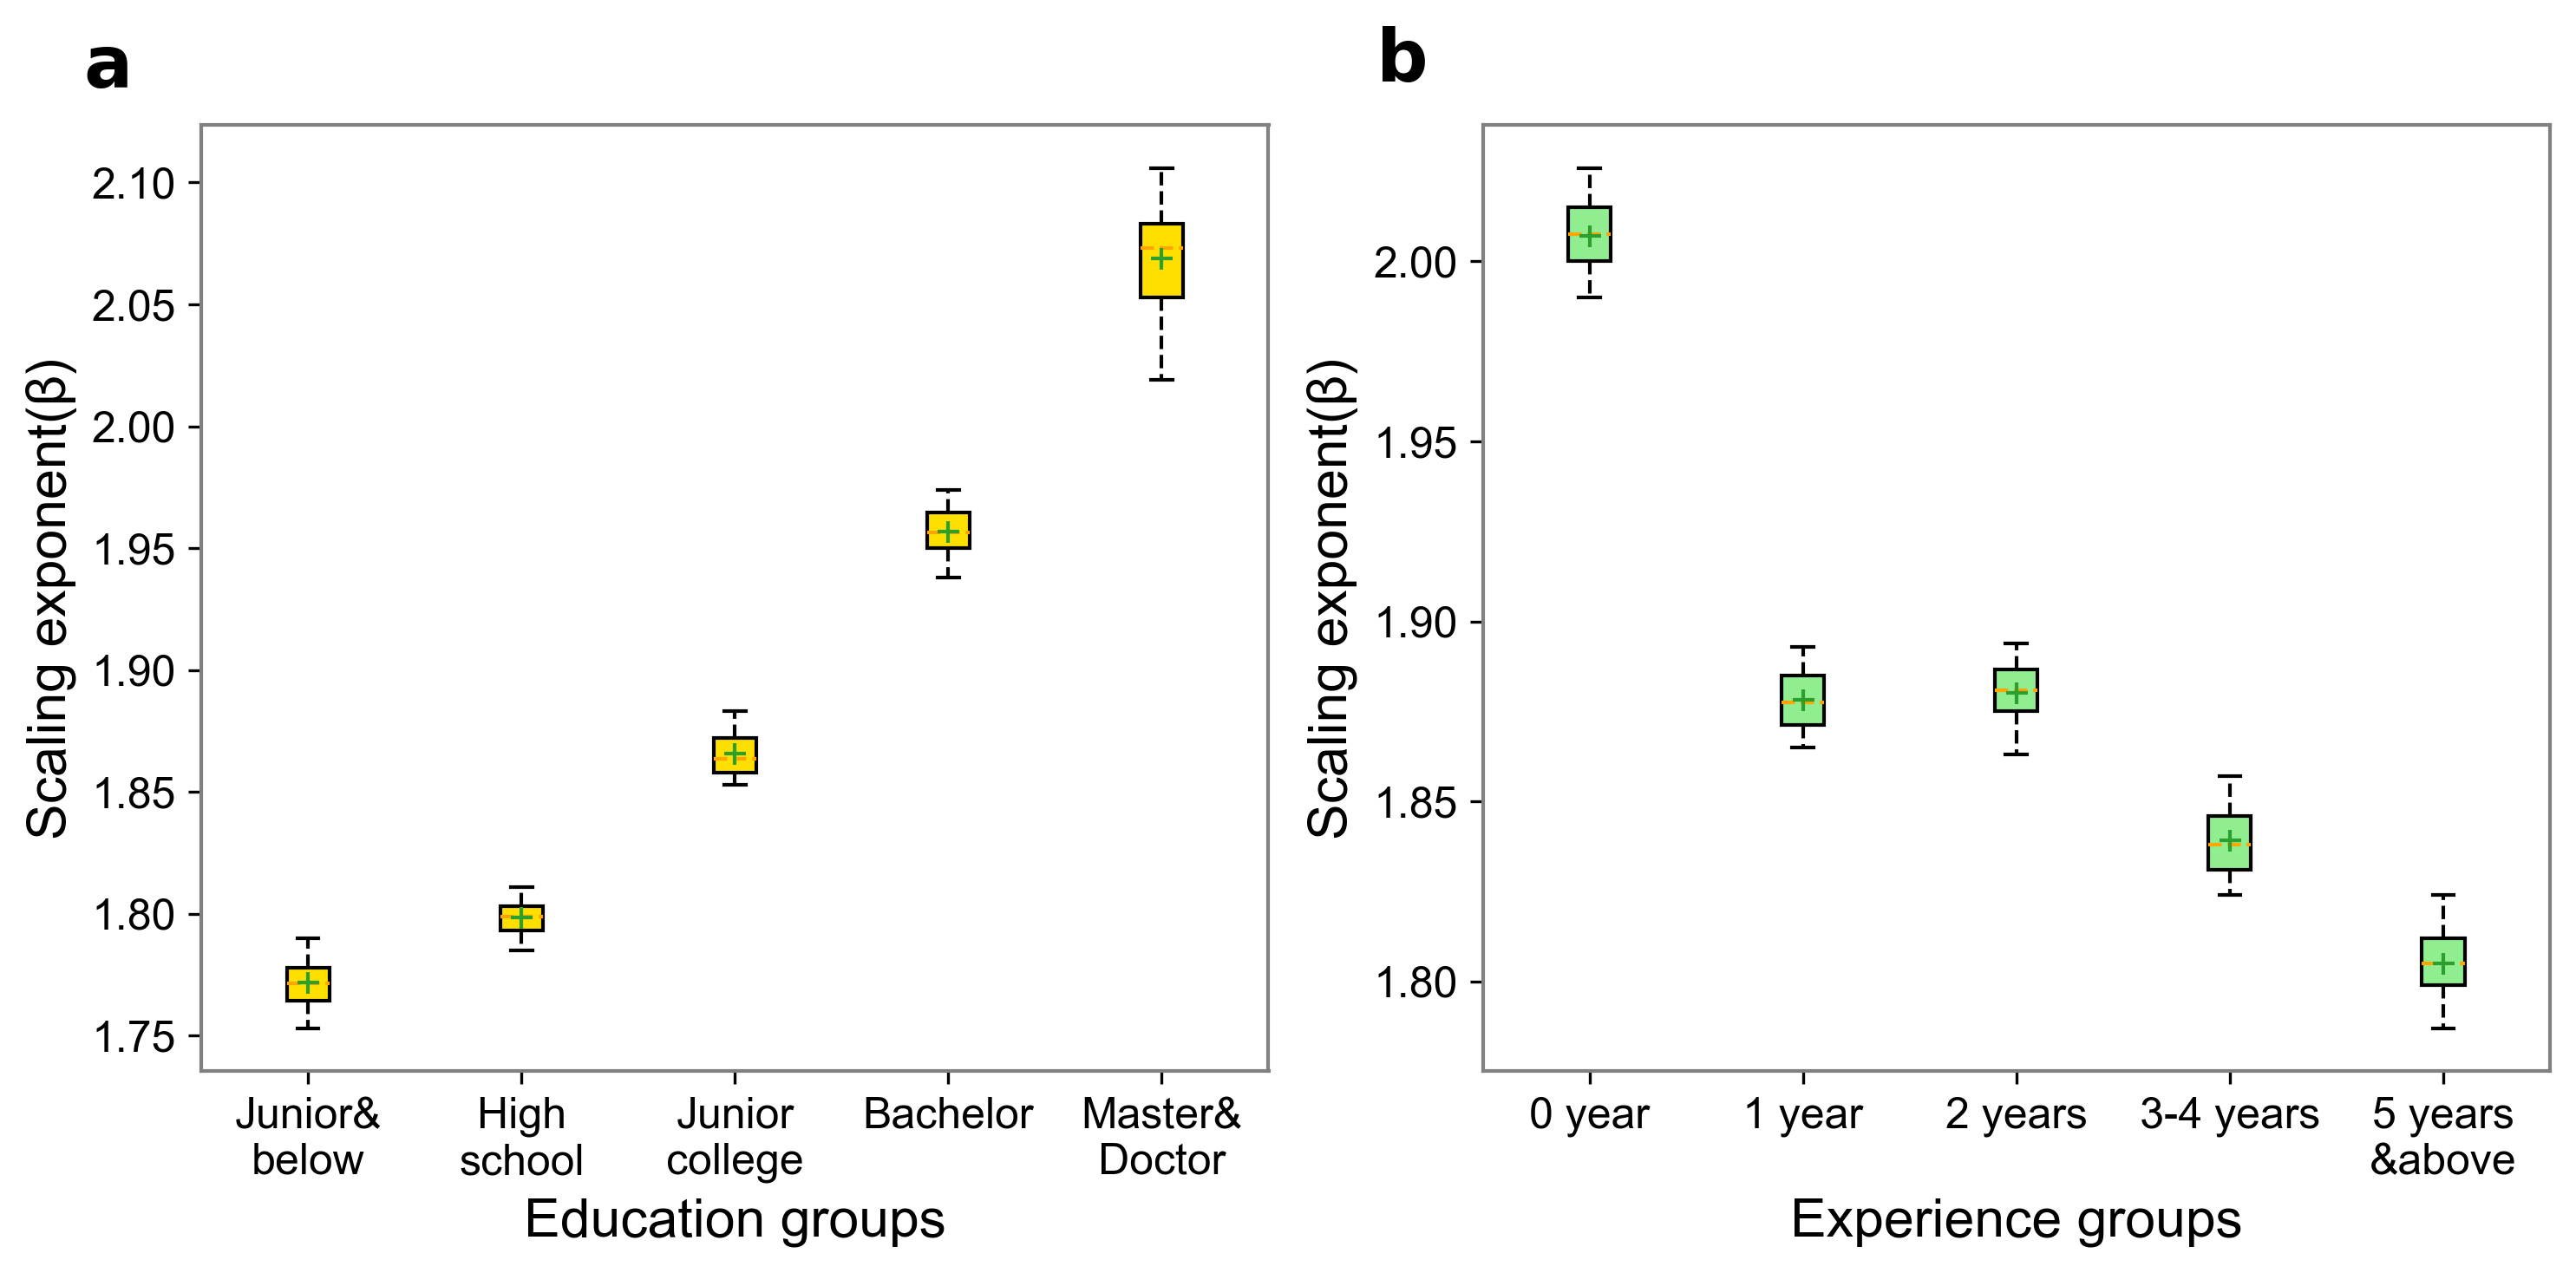

In [19]:
fig=plt.figure(figsize=(10,5),dpi=300)
ax1=plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
dd1=dt[dt['edu']=='Junior school and below']
dd1=dd1[(dd1['beta']>np.percentile(dd1['beta'], 5))&(dd1['beta']<np.percentile(dd1['beta'], 95))]
dd2=dt[dt['edu']=='High school']
dd2=dd2[(dd2['beta']>np.percentile(dd2['beta'], 5))&(dd2['beta']<np.percentile(dd2['beta'], 95))]
dd3=dt[dt['edu']=='Junior college']
dd3=dd3[(dd3['beta']>np.percentile(dd3['beta'], 5))&(dd3['beta']<np.percentile(dd3['beta'], 95))]
dd4=dt[dt['edu']=='Bachelor']
dd4=dd4[(dd4['beta']>np.percentile(dd4['beta'], 5))&(dd4['beta']<np.percentile(dd4['beta'], 95))]
dd5=dt[dt['edu']=='Master/Doctor']
dd5=dd5[(dd5['beta']>np.percentile(dd5['beta'], 5))&(dd5['beta']<np.percentile(dd5['beta'], 95))]
box_1, box_2, box_3, box_4,box_5 = dd1['beta'], dd2['beta'], dd3['beta'], dd4['beta'],dd5['beta']
#fig=plt.figure(figsize=(6,3),dpi=300)#设置画布的尺寸
#plt.title('Examples of boxplot',fontsize=20)#标题，并设定字号大小
labels = 'Junior&\nbelow','High\nschool','Junior\ncollege','Bachelor','Master&\nDoctor'#图例
ax1.boxplot([box_1, box_2, box_3, box_4,box_5], 
    patch_artist=True,showmeans=True, whis=8,widths=0.2, #箱体宽度
    boxprops={'color': 'black', 'facecolor': '#FFDF00'}, #设置箱体属性
    flierprops={'marker': 'o', 'mfc': 'red', 'color': 'black'}, #设置异常值属性
    meanprops={'marker': '+', 'mfc': 'black'}, #设置均值点属性
    medianprops={'ls': '--', 'color': 'orange'}, #设置中位数属性
    whiskerprops={'ls': '--', 'mfc': 'red', 'color': 'black'},labels = labels)#grid=False：代表不显示背景中的网格线
ax1.set_xlabel('Education groups',fontsize=15)
ax1.set_ylabel('Scaling exponent(β)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
bwith = 1 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)#图框下边
TK.spines['left'].set_linewidth(bwith)#图框左边
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
bcolor = 'gray'
TK = plt.gca()#获取边框
TK.spines['bottom'].set_color(bcolor)#图框下边
TK.spines['left'].set_color(bcolor)#图框左边
TK.spines['top'].set_color(bcolor)#图框上边
TK.spines['right'].set_color(bcolor)#图框右边
ax1.text(-0.05, 2.139, "a", fontsize=20, fontweight='extra bold',fontproperties='DejaVu Sans') 

ax2=plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)
data1=dt1[dt1['edu']=='0 year']
data1=data1[(data1['beta']>np.percentile(data1['beta'], 5))&(data1['beta']<np.percentile(data1['beta'], 95))]
data2=dt1[dt1['edu']=='1 year']
data2=data2[(data2['beta']>np.percentile(data2['beta'], 5))&(data2['beta']<np.percentile(data2['beta'], 95))]
data3=dt1[dt1['edu']=='2 years']
data3=data3[(data3['beta']>np.percentile(data3['beta'], 5))&(data3['beta']<np.percentile(data3['beta'], 95))]
data4=dt1[dt1['edu']=='3-4 years']
data4=data4[(data4['beta']>np.percentile(data4['beta'], 5))&(data4['beta']<np.percentile(data4['beta'], 95))]
data5=dt1[dt1['edu']=='5 years and above']
data5=data5[(data5['beta']>np.percentile(data5['beta'], 5))&(data5['beta']<np.percentile(data5['beta'], 95))]
box1, box2, box3, box4,box5 = data1['beta'], data2['beta'], data3['beta'], data4['beta'],data5['beta']
labels = '0 year','1 year','2 years','3-4 years','5 years\n&above'#图例
ax2.boxplot([box1, box2, box3, box4,box5], whis=8,
    patch_artist=True,showmeans=True,widths=0.2, #箱体宽度
    boxprops={'color': 'black', 'facecolor': 'lightgreen'}, #设置箱体属性
    flierprops={'marker': 'o', 'mfc': 'red', 'color': 'black'}, #设置异常值属性
    meanprops={'marker': '+', 'mfc': 'black'}, #设置均值点属性
    medianprops={'ls': '--', 'color': 'orange'}, #设置中位数属性
    whiskerprops={'ls': '--', 'mfc': 'red', 'color': 'black'},
    labels = labels)#grid=False：代表不显示背景中的网格线
ax2.set_xlabel('Experience groups',fontsize=15)
ax2.set_ylabel('Scaling exponent(β)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
bwith = 1 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)#图框下边
TK.spines['left'].set_linewidth(bwith)#图框左边
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
bcolor = 'gray'
TK = plt.gca()#获取边框
TK.spines['bottom'].set_color(bcolor)#图框下边
TK.spines['left'].set_color(bcolor)#图框左边
TK.spines['top'].set_color(bcolor)#图框上边
TK.spines['right'].set_color(bcolor)#图框右边
ax2.text(0, 2.05, "b", fontsize=20, fontweight='extra bold',fontproperties='DejaVu Sans') 
plt.tight_layout()
plt.show()#显示图像
#fig.savefig("figure2_sample.pdf",bbox_inches = 'tight')